In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [6]:
pip install gudhi

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'X', 'Y',  'Tipo']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

# Obtener una lista de fenotipos únicos
    fenotipos_unicos = df['Tipo'].unique().tolist()
    print("Fenotipos únicos:", fenotipos_unicos)

Contenido de high_grade_dysplasia.csv
       id            X            Y              Tipo
0  CellID   X_centroid   Y_centroid         phenotype
1      28  15954.03297  10809.96703  non-immune cells
2     103  15728.93023  9802.246238       tumor cells
3     141  15872.66042  10464.04583  non-immune cells
4     193  16304.46779  10769.14976       tumor cells
Número de IDs distintos: 2311
Fenotipos únicos: ['phenotype', 'non-immune cells', 'tumor cells', 'M1 type macrophage', 'CD4 T cells', 'likely-NKT cells', 'dendritic cells', 'CD8 T cells', 'NKT cells', 'B cells', 'T cells']
Contenido de filtered_high_grade_dysplasia.csv
       id            X            Y                Tipo
0  CellID   X_centroid   Y_centroid           phenotype
1      18  16486.95894  9365.171498         tumor cells
2      37  15374.01905  8094.550794         tumor cells
3     107  16961.31557  9550.714286  M1 type macrophage
4     121  15354.03443  8168.679641  M1 type macrophage
Número de IDs distintos: 914
Fen

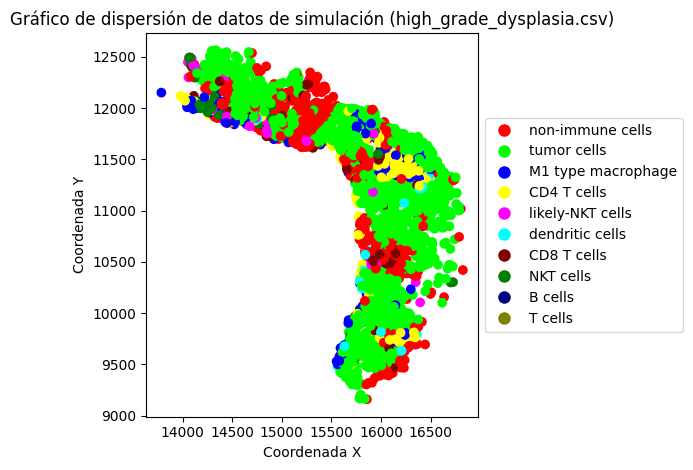

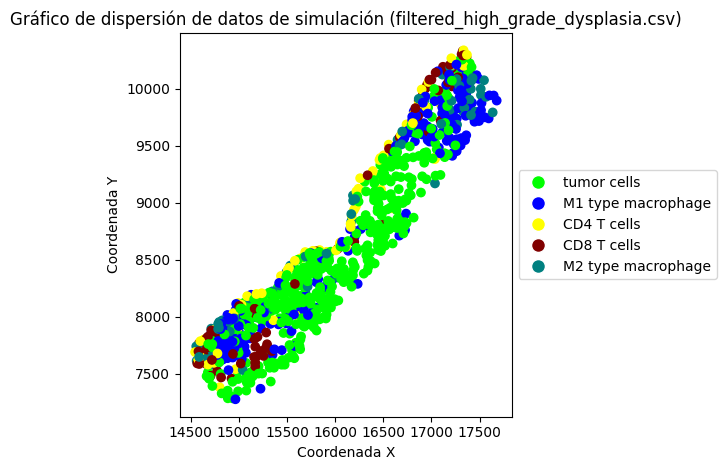

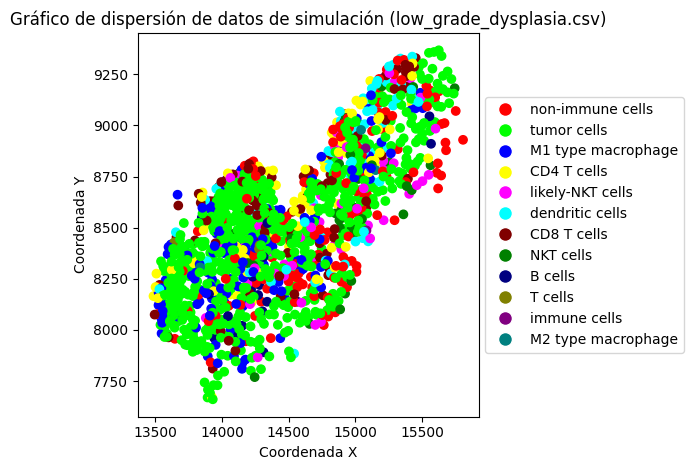

DataFrame 1:
      CellID   X_centroid    Y_centroid           phenotype
0         28  15954.03297  10809.967030    non-immune cells
1        103  15728.93023   9802.246238         tumor cells
2        141  15872.66042  10464.045830    non-immune cells
3        193  16304.46779  10769.149760         tumor cells
4        211  15953.36195  10027.702020         tumor cells
...      ...          ...           ...                 ...
2305   97168  16131.41600  11047.376000         tumor cells
2306   97297  15791.71667  11532.825000    non-immune cells
2307   97315  14218.91379  12106.672410  M1 type macrophage
2308   97411  15988.49351  10739.064940         tumor cells
2309   97454  14718.45161  11913.000000         tumor cells

[2310 rows x 4 columns]

DataFrame 2:
     CellID   X_centroid   Y_centroid           phenotype
0        18  16486.95894  9365.171498         tumor cells
1        37  15374.01905  8094.550794         tumor cells
2       107  16961.31557  9550.714286  M1 type macroph

In [3]:
# Definir un diccionario de colores para cada fenotipo
color_map = {
    'non-immune cells': '#FF0000',  # Rojo
    'tumor cells': '#00FF00',       # Verde
    'M1 type macrophage': '#0000FF',  # Azul
    'CD4 T cells': '#FFFF00',       # Amarillo
    'likely-NKT cells': '#FF00FF',  # Magenta
    'dendritic cells': '#00FFFF',   # Cian
    'CD8 T cells': '#800000',       # Marrón
    'NKT cells': '#008000',         # Verde oscuro
    'B cells': '#000080',           # Azul marino
    'T cells': '#808000',           # Oliva
    'immune cells': '#800080',      # Púrpura
    'M2 type macrophage': '#008080',  # Verde azulado
    'lymphoid cells': '#FFA500'     # Naranja
}

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X, Y y el fenotipo
    X = df['X_centroid']
    Y = df['Y_centroid']
    fenotipo = df['phenotype']
    
    # Crear un mapa de colores basado en los fenotipos
    #unique_fenotipos = fenotipo.unique()
    #colors = plt.cm.get_cmap('hsv', len(unique_fenotipos))  # Usando una paleta de colores
    #color_map = {fenotipo: colors(i) for i, fenotipo in enumerate(unique_fenotipos)}
    
    # Asignar colores a cada punto según el fenotipo
    #colores_puntos = [color_map[t] for t in fenotipo]
      # Asignar colores a cada punto según el fenotipo
    colores_puntos = [color_map.get(t, '#000000') for t in fenotipo] 

    
    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos, label='Células')
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')

    #plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=key, 
    #            markerfacecolor=color_map[key], markersize=10) for key in color_map])
    #plt.show()

    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key, 
                       markerfacecolor=color, markersize=10) 
                       for key, color in color_map.items() if key in fenotipo.unique()]
    plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Agregar el DataFrame a la lista
    dataframes.append(df)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()

# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada DataFrame
for df in dataframes:
    # Calcular la matriz de distancias
    matrix_distance = pdist(df[['X_centroid', 'Y_centroid']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

# Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

/home/jupyter-user5/.local/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")
/opt/conda/envs/umap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


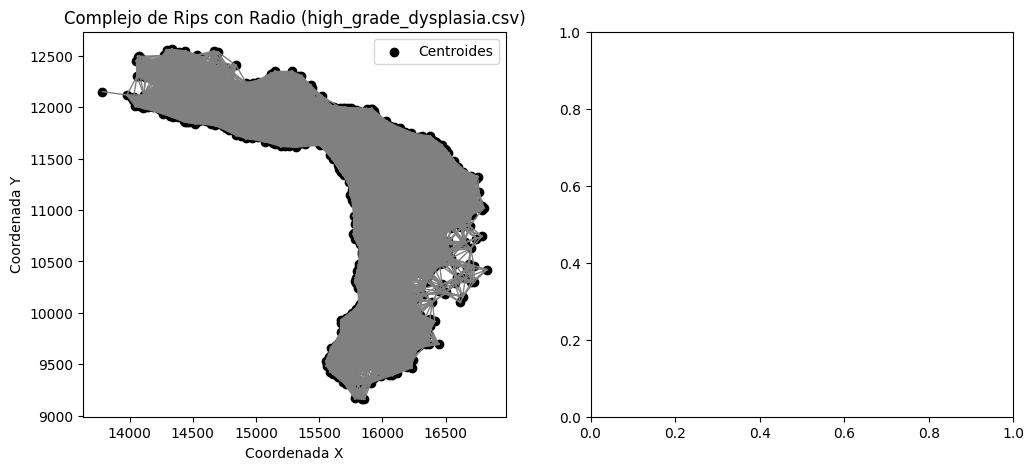

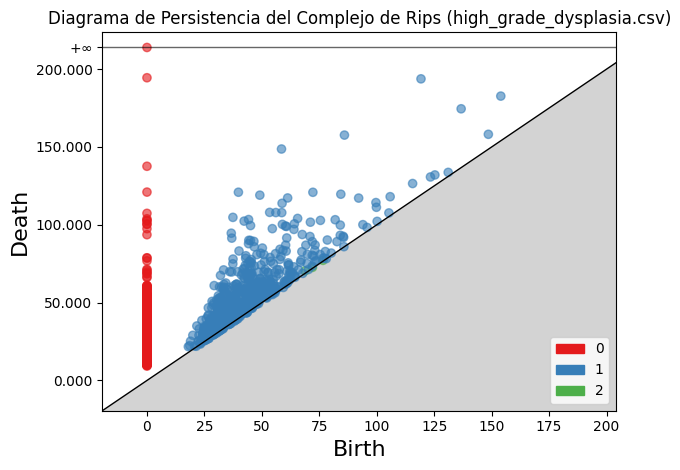

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 52, 'non-immune cells': 35, 'CD4 T cells': 3}
CellID: 103 tumor cells | Fenotipos de Vecinos: {'tumor cells': 56, 'M1 type macrophage': 10, 'CD4 T cells': 3, 'CD8 T cells': 3, 'non-immune cells': 2, 'dendritic cells': 1}
CellID: 141 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 38, 'non-immune cells': 18, 'likely-NKT cells': 12, 'CD8 T cells': 9, 'CD4 T cells': 8, 'dendritic cells': 6, 'M1 type macrophage': 2}
CellID: 193 tumor cells | Fenotipos de Vecinos: {'tumor cells': 43, 'non-immune cells': 11}
CellID: 211 tumor cells | Fenotipos de Vecinos: {'tumor cells': 93, 'M1 type macrophage': 7, 'CD4 T cells': 4, 'B cells': 1, 'CD8 T cells': 1, 'non-immune cells': 1}
CellID: 245 tumor cells | Fenotipos de Vecinos: {'tumor cells': 23}
CellID: 251 tumor cells | Fenotipos de Vecinos: {'tumor cells': 44, 'M1 type macrophage': 14, 'dendritic cells': 2, 'CD4 T cells': 2, 'CD8 T cells'

/opt/conda/envs/umap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


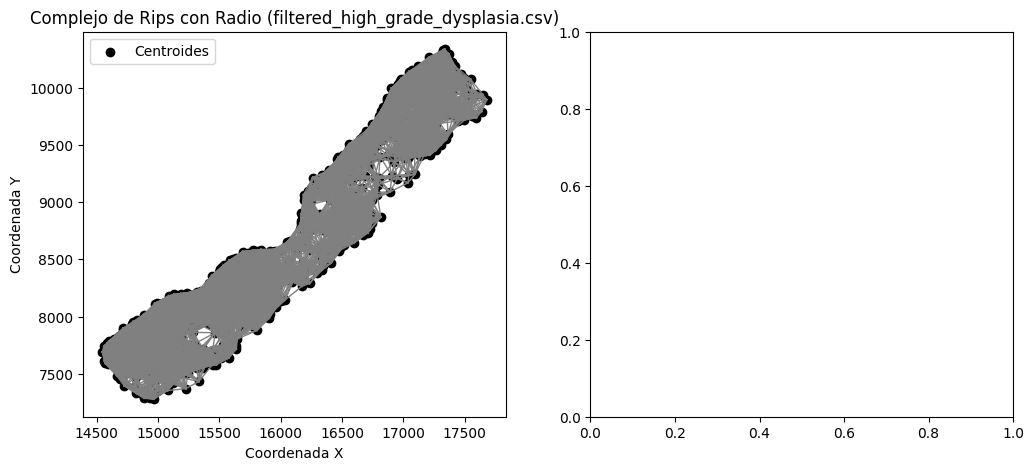

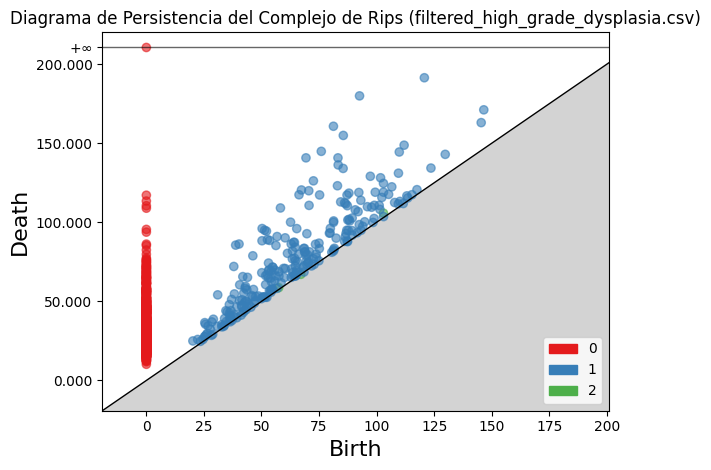

Archivo: filtered_high_grade_dysplasia.csv
CellID: 18 tumor cells | Fenotipos de Vecinos: {'tumor cells': 21, 'CD4 T cells': 7, 'M1 type macrophage': 2, 'CD8 T cells': 2}
CellID: 37 tumor cells | Fenotipos de Vecinos: {'tumor cells': 41, 'M1 type macrophage': 10, 'M2 type macrophage': 3, 'CD4 T cells': 2}
CellID: 107 M1 type macrophage | Fenotipos de Vecinos: {'M1 type macrophage': 16, 'tumor cells': 12, 'CD4 T cells': 2, 'CD8 T cells': 1, 'M2 type macrophage': 1}
CellID: 121 M1 type macrophage | Fenotipos de Vecinos: {'tumor cells': 39, 'M1 type macrophage': 6, 'M2 type macrophage': 4, 'CD4 T cells': 3}
CellID: 168 tumor cells | Fenotipos de Vecinos: {'tumor cells': 17, 'M1 type macrophage': 4}
CellID: 499 tumor cells | Fenotipos de Vecinos: {'tumor cells': 16, 'M1 type macrophage': 4}
CellID: 518 tumor cells | Fenotipos de Vecinos: {'tumor cells': 9, 'CD8 T cells': 2, 'CD4 T cells': 1, 'M1 type macrophage': 1}
CellID: 597 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 18, 'CD4 T

/opt/conda/envs/umap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


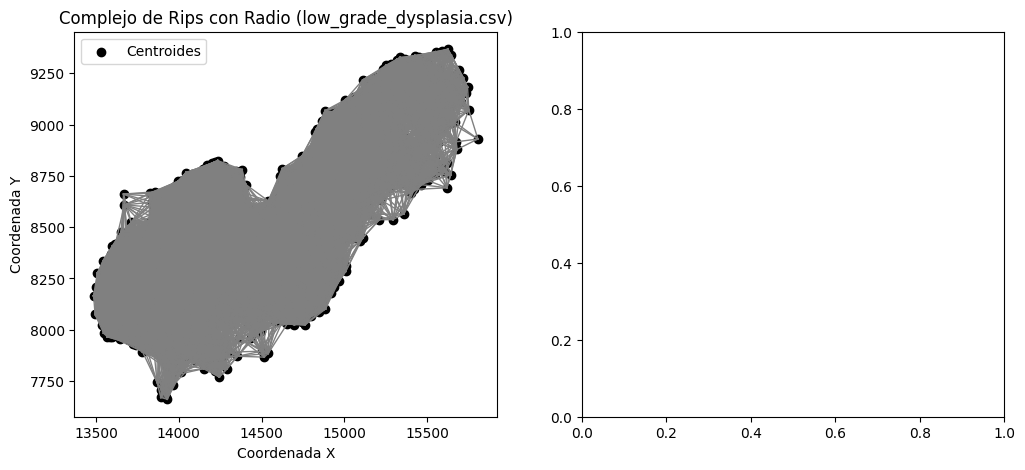

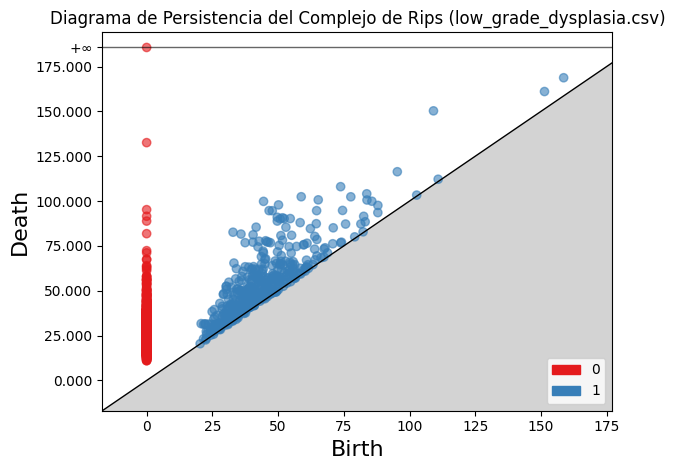

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 33, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 7, 'CD8 T cells': 6, 'likely-NKT cells': 5, 'M1 type macrophage': 4, 'NKT cells': 3}
CellID: 186 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 24, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 9, 'M1 type macrophage': 8, 'likely-NKT cells': 3, 'CD8 T cells': 3, 'NKT cells': 2, 'M2 type macrophage': 2, 'immune cells': 1}
CellID: 208 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 16, 'non-immune cells': 12, 'CD4 T cells': 11, 'NKT cells': 6, 'dendritic cells': 5, 'likely-NKT cells': 4, 'CD8 T cells': 2, 'M1 type macrophage': 1, 'M2 type macrophage': 1}
CellID: 274 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 35, 'non-immune cells': 10, 'NKT cells': 6, 'likely-NKT cells': 6, 'dendritic cells': 6, 'M1 type macrophage': 5, 'CD4 T cells': 1, 'M2 type macrophage': 1, 'immune cells': 1, 'CD8 T ce

In [5]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa)
    nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
    df.columns = nombres_columnas
    
    # Extraer las coordenadas de los centroides
    X = df['X_centroid']
    Y = df['Y_centroid']
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(X, Y)))

    # Calcular el complejo de Rips con un radio específico
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=200)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [X[i] for i in arista]
            y = [Y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()

    # ---- Nueva sección para calcular los vecinos ----
    # Usar un KDTree para calcular los vecinos de cada punto
    kdtree = KDTree(puntos)

    # Definir el radio para considerar a un punto como vecino
    radio_vecinos = 200  # El mismo radio utilizado para el complejo de Rips

    # Calcular los vecinos para cada punto dentro del radio
    vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

    # Mostrar resultados para cada célula
    print(f'Archivo: {archivo_csv}')
    for i, celula_vecinos in enumerate(vecinos):
        # Remover la célula en sí misma de la lista de vecinos
        celula_vecinos = [idx for idx in celula_vecinos if idx != i]
        
        # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
        fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts()
        
        # Convertir el resultado a un diccionario para mostrarlo en el formato deseado
        fenotipos_vecinos_dict = fenotipos_vecinos.to_dict()
        
        print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos de Vecinos: {fenotipos_vecinos_dict}')
    print('-----------------------------------------\n')


In [12]:
# import os
# import pandas as pd
# import numpy as np
# import gudhi as gd
# import matplotlib.pyplot as plt
# from scipy.spatial import KDTree

# # Ruta del directorio que contiene los archivos CSV
# ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"

# # Definir el número de vecinos a considerar
# num_vecinos_a_considerar = 5  # Cambia este valor según lo que necesites

# # Obtener una lista de todos los archivos CSV en la ruta especificada
# archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# # Iterar sobre cada archivo CSV
# for archivo_csv in archivos_csv:
#     # Construir la ruta completa del archivo
#     ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
#     # Leer el archivo CSV y asignar nombres de columnas
#     df = pd.read_csv(ruta_completa)
#     nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
#     df.columns = nombres_columnas
    
#     # Extraer las coordenadas de los centroides
#     X = df['X_centroid']
#     Y = df['Y_centroid']
    
#     # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
#     puntos = np.array(list(zip(X, Y)))

#     # Usar un KDTree para calcular los vecinos de cada punto
#     kdtree = KDTree(puntos)

#     # Calcular los 'num_vecinos_a_considerar' vecinos más cercanos para cada punto
#     distancias, indices_vecinos = kdtree.query(puntos, k=num_vecinos_a_considerar + 1)

#     # Crear el complejo de Rips manualmente usando los vecinos más cercanos
#     simplex_tree = gd.SimplexTree()
    
#     for i, vecinos in enumerate(indices_vecinos):
#         # Remover la célula en sí misma de la lista de vecinos (índice 0)
#         vecinos = vecinos[1:]
        
#         # Añadir el punto individualmente como un 0-simplejo
#         simplex_tree.insert([i])
        
#         # Añadir las aristas entre la célula y sus vecinos
#         for vecino in vecinos:
#             simplex_tree.insert([i, vecino], filtration=distancias[i][vecinos.tolist().index(vecino) + 1])

#     # Visualizar el complejo de Rips
#     plt.figure(figsize=(12, 5))

#     plt.subplot(1, 2, 1)
#     plt.scatter(X, Y, color='black', label='Centroides')
#     for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
#         if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
#             arista = simplex[0]
#             x = [X[i] for i in arista]
#             y = [Y[i] for i in arista]
#             plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
#     plt.xlabel('Coordenada X')
#     plt.ylabel('Coordenada Y')
#     plt.title(f'Complejo de Rips con {num_vecinos_a_considerar} Vecinos ({archivo_csv})')
#     plt.legend()

#     # Calcular el diagrama de persistencia
#     diag = simplex_tree.persistence()

#     # Mostrar el diagrama de dispersión de persistencia
#     plt.subplot(1, 2, 2)
#     gd.plot_persistence_diagram(diag)
#     plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
#     plt.xlabel('Birth')
#     plt.ylabel('Death')

#     plt.tight_layout()
#     plt.show()

#     # ---- Sección para calcular los fenotipos de los vecinos ----
#     print(f'Archivo: {archivo_csv}')
#     for i, vecinos in enumerate(indices_vecinos):
#         # Remover la célula en sí misma de la lista de vecinos (índice 0)
#         vecinos = vecinos[1:]
        
#         # Obtener los fenotipos de los vecinos
#         fenotipos_vecinos = df.loc[vecinos, 'phenotype'].unique()
        
#         print(f'CellID: {df["CellID"].iloc[i]}  {df["phenotype"].iloc[i]}| Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
#     print('-----------------------------------------\n')


In [13]:
# import os
# import pandas as pd
# import numpy as np
# import gudhi as gd
# import matplotlib.pyplot as plt
# from scipy.spatial import KDTree

# def analizar_vecinos_y_complejo(ruta_directorio, num_vecinos=5, max_edge_length=200):
#     """
#     Analiza los vecinos y genera el complejo de Rips para los archivos CSV en un directorio dado.
    
#     Parámetros:
#     - ruta_directorio: Ruta del directorio que contiene los archivos CSV.
#     - num_vecinos: Número de vecinos más cercanos a considerar para cada célula.
#     - max_edge_length: Radio máximo para el cálculo del complejo de Rips.
#     """
    
#     # Obtener una lista de todos los archivos CSV en la ruta especificada
#     archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

#     # Iterar sobre cada archivo CSV
#     for archivo_csv in archivos_csv:
#         # Construir la ruta completa del archivo
#         ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
#         # Leer el archivo CSV y asignar nombres de columnas
#         df = pd.read_csv(ruta_completa)
#         nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
#         df.columns = nombres_columnas
        
#         # Extraer las coordenadas de los centroides
#         X = df['X_centroid']
#         Y = df['Y_centroid']
        
#         # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
#         puntos = np.array(list(zip(X, Y)))

#         # Calcular el complejo de Rips con un radio específico
#         rips_complex = gd.RipsComplex(points=puntos, max_edge_length=max_edge_length)
#         simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

#         # Visualizar el complejo de Rips
#         plt.figure(figsize=(12, 5))

#         plt.subplot(1, 2, 1)
#         plt.scatter(X, Y, color='black', label='Centroides')
#         for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
#             if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
#                 arista = simplex[0]
#                 x = [X[i] for i in arista]
#                 y = [Y[i] for i in arista]
#                 plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
#         plt.xlabel('Coordenada X')
#         plt.ylabel('Coordenada Y')
#         plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
#         plt.legend()

#         # Calcular el diagrama de persistencia
#         diag = simplex_tree.persistence()

#         # Mostrar el diagrama de dispersión de persistencia
#         plt.subplot(1, 2, 2)
#         gd.plot_persistence_diagram(diag)
#         plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
#         plt.xlabel('Birth')
#         plt.ylabel('Death')

#         plt.tight_layout()
#         plt.show()

#         # ---- Sección para calcular los vecinos más cercanos ----
#         # Usar un KDTree para calcular los vecinos de cada punto
#         kdtree = KDTree(puntos)

#         # Calcular los vecinos más cercanos (k-vecinos) para cada punto
#         distancias, indices_vecinos = kdtree.query(puntos, k=num_vecinos + 1)  # Incluye el propio punto

#         # Mostrar resultados para cada célula
#         print(f'Archivo: {archivo_csv}')
#         for i, vecinos in enumerate(indices_vecinos):
#             # Remover la célula en sí misma de la lista de vecinos
#             celula_vecinos = vecinos[vecinos != i]
            
#             # Obtener los fenotipos de los vecinos
#             fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].unique()
            
#             print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos Únicos de Vecinos: {fenotipos_vecinos}')
#         print('-----------------------------------------\n')


In [14]:
# analizar_vecinos_y_complejo(ruta_directorio="/home/jupyter-user5/multicellularity_patterns_classification-/datos_c", num_vecinos=8, max_edge_length=200)

In [6]:
def analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips=200):
    """
    Lee los archivos CSV de un directorio, calcula los complejos de Rips y los vecinos dentro de un radio dado,
    visualiza los resultados y guarda los datos de los vecinos en un DataFrame.

    :param ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    :param radio_complejo_rips: Radio para calcular el complejo de Rips y los vecinos.
    :return: DataFrame con información de los vecinos.
    """
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
    # Inicializar una lista para almacenar los datos de vecinos
    datos_vecinos = []

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_complejo_rips)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio {radio_complejo_rips} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Nueva sección para calcular los vecinos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Definir el radio para considerar a un punto como vecino
        radio_vecinos = radio_complejo_rips  # Usar el mismo radio utilizado para el complejo de Rips

        # Calcular los vecinos para cada punto dentro del radio
        vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts()
            
            # Convertir el resultado a un diccionario para mostrarlo en el formato deseado
            fenotipos_vecinos_dict = fenotipos_vecinos.to_dict()
            
            # Guardar la información en la lista de datos de vecinos
            datos_vecinos.append({
                'CellID': df["CellID"].iloc[i],
                'Phenotype': df["phenotype"].iloc[i],
                'Num_Vecinos': len(celula_vecinos),
                'Vecinos': celula_vecinos,
                'Fenotipos_Vecinos': fenotipos_vecinos_dict
            })
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos de Vecinos: {fenotipos_vecinos_dict}')
        print('-----------------------------------------\n')

    # Convertir la lista de datos de vecinos en un DataFrame
    df_vecinos = pd.DataFrame(datos_vecinos)
    
    return df_vecinos



KeyboardInterrupt: 

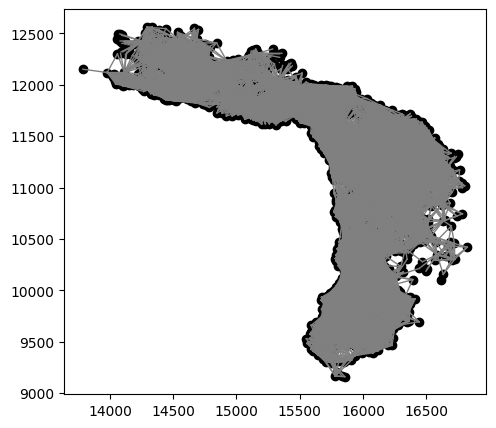

In [7]:
# Usar la función para analizar los datos
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
radio_complejo_rips = 200
df_resultados = analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips)

# Mostrar los resultados
print(df_resultados)

In [17]:
df_resultados

CellID         Phenotype  Num_Vecinos  \
0         28  non-immune cells           90   
1        103       tumor cells           75   
2        141  non-immune cells           93   
3        193       tumor cells           54   
4        211       tumor cells          107   
...      ...               ...          ...   
4482   96234       tumor cells           85   
4483   96574       tumor cells           93   
4484   96901       tumor cells           92   
4485   97160  non-immune cells          152   
4486   97442       tumor cells          132   

                                                Vecinos  \
0     [61, 77, 112, 158, 171, 202, 230, 243, 433, 44...   
1     [7, 23, 43, 49, 56, 59, 107, 108, 155, 192, 20...   
2     [20, 30, 31, 33, 44, 88, 90, 162, 211, 229, 24...   
3     [27, 42, 53, 69, 74, 85, 102, 115, 131, 137, 1...   
4     [8, 26, 34, 55, 57, 91, 119, 125, 127, 143, 15...   
...                                                 ...   
4482  [0, 2, 28, 85, 89, 91, 102, 118, 132, 147, 152...   
4483  [136, 159, 173, 177, 207, 212, 231, 244, 261, ...   
4484  [11, 71, 86, 126, 139, 164, 214, 229, 268, 282...   
4485  [32, 36, 44, 64, 74, 99, 136, 150, 156, 159, 1...   
4486  [31, 32, 36, 44, 141, 144, 146, 149, 150, 161,...   

                                      Fenotipos_Vecinos  
0     {'tumor cells': 52, 'non-immune cells': 35, 'C...  
1     {'tumor cells': 56, 'M1 type macrophage': 10, ...  
2     {'tumor cells': 38, 'non-immune cells': 18, 'l...  
3           {'tumor cells': 43, 'non-immune cells': 11}  
4     {'tumor cells': 93, 'M1 type macrophage': 7, '...  
...                                                 ...  
4482  {'tumor cells': 26, 'non-immune cells': 16, 'C...  
4483  {'tumor cells': 47, 'CD8 T cells': 11, 'CD4 T ...  
4484  {'tumor cells': 64, 'M1 type macrophage': 17, ...  
4485  {'tumor cells': 99, 'CD8 T cells': 17, 'non-im...  
4486  {'tumor cells': 76, 'M1 type macrophage': 30, ...  

[4487 rows x 5 columns]

In [20]:
def analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips=200):
    """
    Lee los archivos CSV de un directorio, calcula los complejos de Rips y los vecinos dentro de un radio dado,
    visualiza los resultados y guarda los datos de los vecinos en un DataFrame.

    :param ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    :param radio_complejo_rips: Radio para calcular el complejo de Rips y los vecinos.
    :return: DataFrame con información de los vecinos.
    """
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
    # Inicializar una lista para almacenar los datos de vecinos
    datos_vecinos = []

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_complejo_rips)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio {radio_complejo_rips} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Nueva sección para calcular los vecinos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Definir el radio para considerar a un punto como vecino
        radio_vecinos = radio_complejo_rips  # Usar el mismo radio utilizado para el complejo de Rips

        # Calcular los vecinos para cada punto dentro del radio
        vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

        # Calcular los fenotipos únicos de las células
        fenotipos_unicos = df['phenotype'].unique()

        # Inicializar un diccionario para los datos de vecinos
        datos_para_df = {'CellID': [], 'Phenotype': []}
        for fenotipo in fenotipos_unicos:
            datos_para_df[fenotipo] = []

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts().to_dict()
            
            # Añadir los datos de la célula actual al diccionario
            datos_para_df['CellID'].append(df["CellID"].iloc[i])
            datos_para_df['Phenotype'].append(df["phenotype"].iloc[i])
            
            # Llenar el número de vecinos de cada fenotipo, o 0 si no hay
            for fenotipo in fenotipos_unicos:
                datos_para_df[fenotipo].append(fenotipos_vecinos.get(fenotipo, 0))
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos de Vecinos: {fenotipos_vecinos}')
        print('-----------------------------------------\n')

        # Convertir el diccionario en un DataFrame y agregarlo a la lista de resultados
        df_vecinos = pd.DataFrame(datos_para_df)
        datos_vecinos.append(df_vecinos)

    # Concatenar todos los DataFrames de resultados en uno solo
    df_resultado_final = pd.concat(datos_vecinos, ignore_index=True)
    
    return df_resultado_final


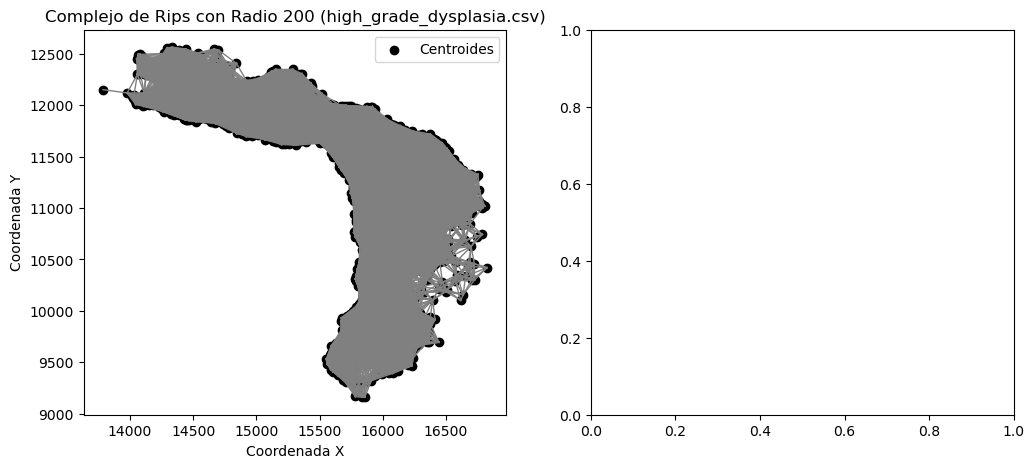

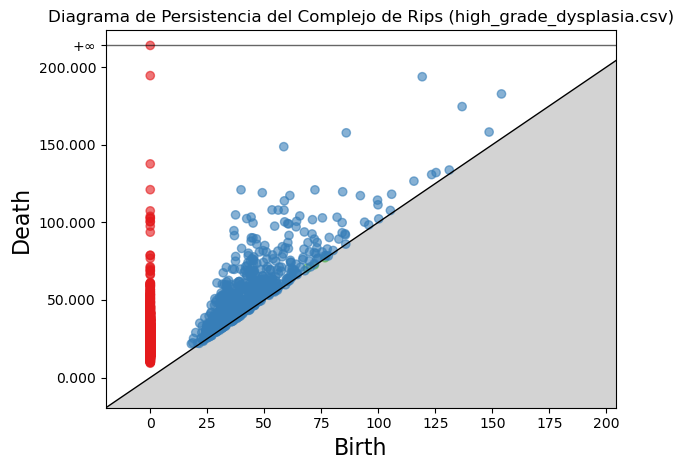

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 52, 'non-immune cells': 35, 'CD4 T cells': 3}
CellID: 103 tumor cells | Fenotipos de Vecinos: {'tumor cells': 56, 'M1 type macrophage': 10, 'CD4 T cells': 3, 'CD8 T cells': 3, 'non-immune cells': 2, 'dendritic cells': 1}
CellID: 141 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 38, 'non-immune cells': 18, 'likely-NKT cells': 12, 'CD8 T cells': 9, 'CD4 T cells': 8, 'dendritic cells': 6, 'M1 type macrophage': 2}
CellID: 193 tumor cells | Fenotipos de Vecinos: {'tumor cells': 43, 'non-immune cells': 11}
CellID: 211 tumor cells | Fenotipos de Vecinos: {'tumor cells': 93, 'M1 type macrophage': 7, 'CD4 T cells': 4, 'B cells': 1, 'CD8 T cells': 1, 'non-immune cells': 1}
CellID: 245 tumor cells | Fenotipos de Vecinos: {'tumor cells': 23}
CellID: 251 tumor cells | Fenotipos de Vecinos: {'tumor cells': 44, 'M1 type macrophage': 14, 'dendritic cells': 2, 'CD4 T cells': 2, 'CD8 T cells'

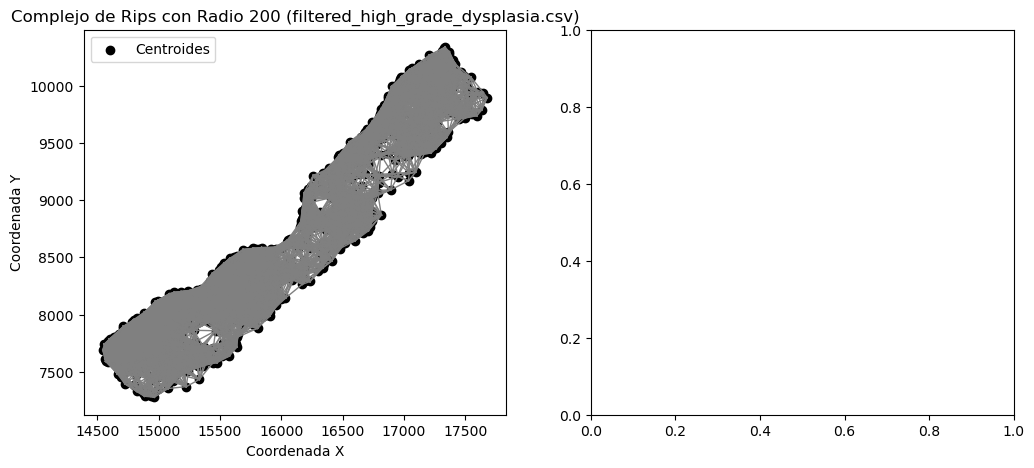

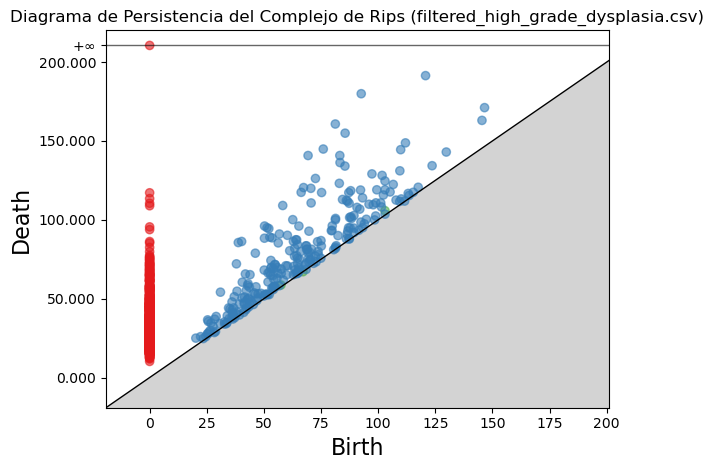

Archivo: filtered_high_grade_dysplasia.csv
CellID: 18 tumor cells | Fenotipos de Vecinos: {'tumor cells': 21, 'CD4 T cells': 7, 'M1 type macrophage': 2, 'CD8 T cells': 2}
CellID: 37 tumor cells | Fenotipos de Vecinos: {'tumor cells': 41, 'M1 type macrophage': 10, 'M2 type macrophage': 3, 'CD4 T cells': 2}
CellID: 107 M1 type macrophage | Fenotipos de Vecinos: {'M1 type macrophage': 16, 'tumor cells': 12, 'CD4 T cells': 2, 'CD8 T cells': 1, 'M2 type macrophage': 1}
CellID: 121 M1 type macrophage | Fenotipos de Vecinos: {'tumor cells': 39, 'M1 type macrophage': 6, 'M2 type macrophage': 4, 'CD4 T cells': 3}
CellID: 168 tumor cells | Fenotipos de Vecinos: {'tumor cells': 17, 'M1 type macrophage': 4}
CellID: 499 tumor cells | Fenotipos de Vecinos: {'tumor cells': 16, 'M1 type macrophage': 4}
CellID: 518 tumor cells | Fenotipos de Vecinos: {'tumor cells': 9, 'CD8 T cells': 2, 'CD4 T cells': 1, 'M1 type macrophage': 1}
CellID: 597 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 18, 'CD4 T

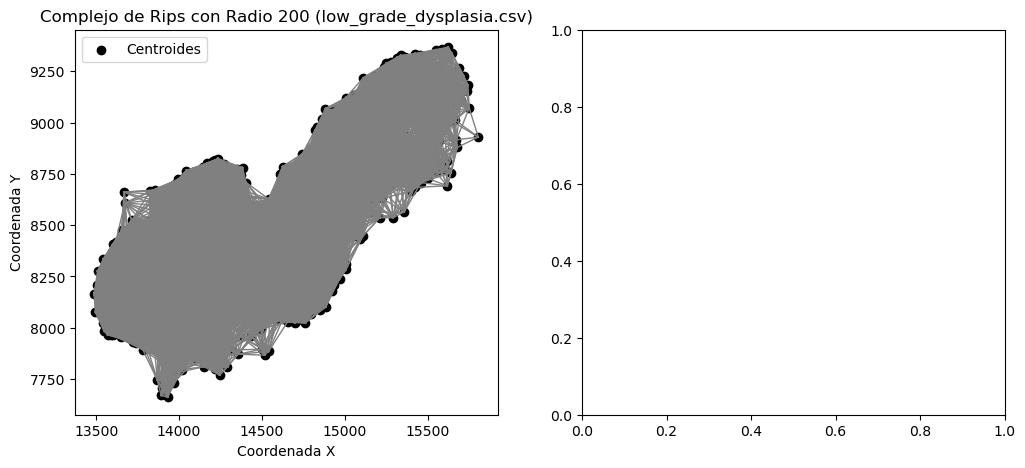

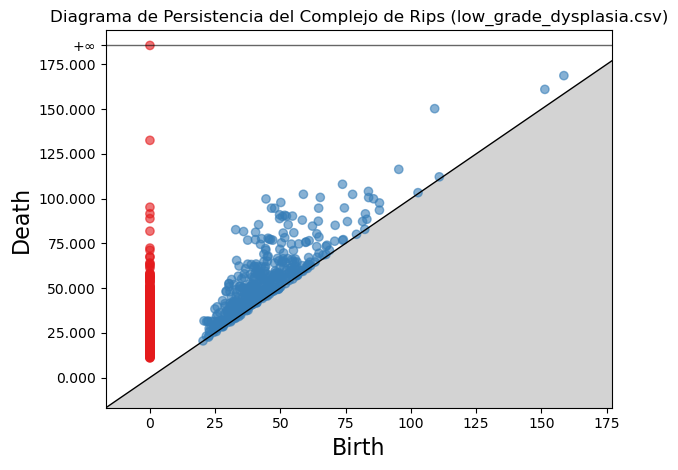

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 33, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 7, 'CD8 T cells': 6, 'likely-NKT cells': 5, 'M1 type macrophage': 4, 'NKT cells': 3}
CellID: 186 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 24, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 9, 'M1 type macrophage': 8, 'likely-NKT cells': 3, 'CD8 T cells': 3, 'NKT cells': 2, 'M2 type macrophage': 2, 'immune cells': 1}
CellID: 208 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 16, 'non-immune cells': 12, 'CD4 T cells': 11, 'NKT cells': 6, 'dendritic cells': 5, 'likely-NKT cells': 4, 'CD8 T cells': 2, 'M1 type macrophage': 1, 'M2 type macrophage': 1}
CellID: 274 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 35, 'non-immune cells': 10, 'NKT cells': 6, 'likely-NKT cells': 6, 'dendritic cells': 6, 'M1 type macrophage': 5, 'CD4 T cells': 1, 'M2 type macrophage': 1, 'immune cells': 1, 'CD8 T ce

In [21]:
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
radio_complejo_rips = 200
df_resultados = analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips)


In [22]:
df_resultados

CellID         Phenotype  non-immune cells  tumor cells  \
0         28  non-immune cells              35.0           52   
1        103       tumor cells               2.0           56   
2        141  non-immune cells              18.0           38   
3        193       tumor cells              11.0           43   
4        211       tumor cells               1.0           93   
...      ...               ...               ...          ...   
4482   96234       tumor cells              16.0           26   
4483   96574       tumor cells               8.0           47   
4484   96901       tumor cells               4.0           64   
4485   97160  non-immune cells              14.0           99   
4486   97442       tumor cells               5.0           76   

      M1 type macrophage  CD4 T cells  likely-NKT cells  dendritic cells  \
0                      0            3               0.0              0.0   
1                     10            3               0.0              1.0   
2                      2            8              12.0              6.0   
3                      0            0               0.0              0.0   
4                      7            4               0.0              0.0   
...                  ...          ...               ...              ...   
4482                   3           13               4.0             12.0   
4483                   7           10               5.0              3.0   
4484                  17            3               0.0              1.0   
4485                   7            4               5.0              4.0   
4486                  30            6               5.0              3.0   

      CD8 T cells  NKT cells  B cells  T cells  M2 type macrophage  \
0               0        0.0      0.0      0.0                 NaN   
1               3        0.0      0.0      0.0                 NaN   
2               9        0.0      0.0      0.0                 NaN   
3               0        0.0      0.0      0.0                 NaN   
4               1        0.0      1.0      0.0                 NaN   
...           ...        ...      ...      ...                 ...   
4482            2        7.0      0.0      0.0                 1.0   
4483           11        1.0      1.0      0.0                 0.0   
4484            3        0.0      0.0      0.0                 0.0   
4485           17        1.0      1.0      0.0                 0.0   
4486            3        3.0      0.0      1.0                 0.0   

      immune cells  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
4482           1.0  
4483           0.0  
4484           0.0  
4485           0.0  
4486           0.0  

[4487 rows x 14 columns]

antes me aparecen todos juntos, agregar que me separe por archivos 

In [23]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips=200):
    """
    Lee los archivos CSV de un directorio, calcula los complejos de Rips y los vecinos dentro de un radio dado,
    visualiza los resultados y guarda los datos de los vecinos en un DataFrame.

    :param ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    :param radio_complejo_rips: Radio para calcular el complejo de Rips y los vecinos.
    :return: Diccionario de DataFrames con información de los vecinos, uno por cada archivo.
    """
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
    # Inicializar un diccionario para almacenar los DataFrames de vecinos por archivo
    resultados_por_archivo = {}

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_complejo_rips)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio {radio_complejo_rips} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Nueva sección para calcular los vecinos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Definir el radio para considerar a un punto como vecino
        radio_vecinos = radio_complejo_rips  # Usar el mismo radio utilizado para el complejo de Rips

        # Calcular los vecinos para cada punto dentro del radio
        vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

        # Calcular los fenotipos únicos de las células
        fenotipos_unicos = df['phenotype'].unique()

        # Inicializar un diccionario para los datos de vecinos
        datos_para_df = {'CellID': [], 'Phenotype': []}
        for fenotipo in fenotipos_unicos:
            datos_para_df[fenotipo] = []

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts().to_dict()
            
            # Añadir los datos de la célula actual al diccionario
            datos_para_df['CellID'].append(df["CellID"].iloc[i])
            datos_para_df['Phenotype'].append(df["phenotype"].iloc[i])
            
            # Llenar el número de vecinos de cada fenotipo, o 0 si no hay
            for fenotipo in fenotipos_unicos:
                datos_para_df[fenotipo].append(fenotipos_vecinos.get(fenotipo, 0))
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos de Vecinos: {fenotipos_vecinos}')
        print('-----------------------------------------\n')

        # Convertir el diccionario en un DataFrame y agregarlo al diccionario de resultados
        df_vecinos = pd.DataFrame(datos_para_df)
        resultados_por_archivo[archivo_csv] = df_vecinos

    return resultados_por_archivo




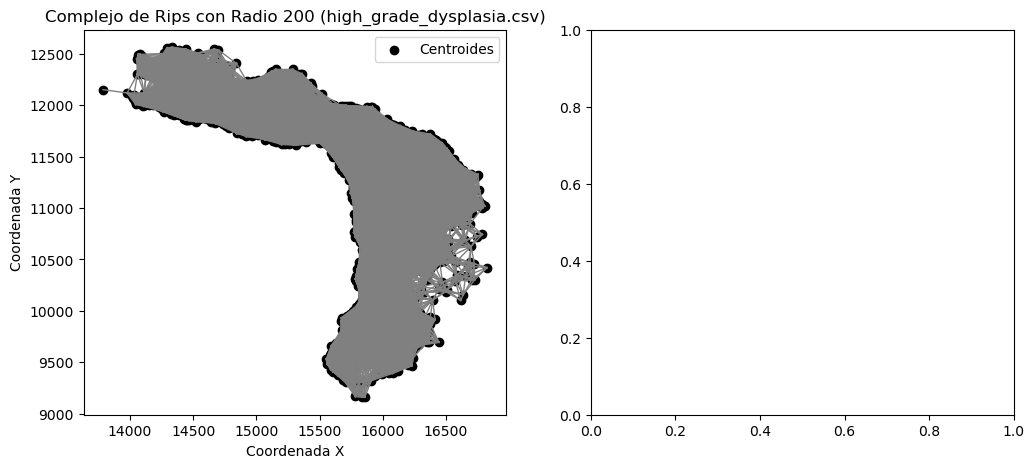

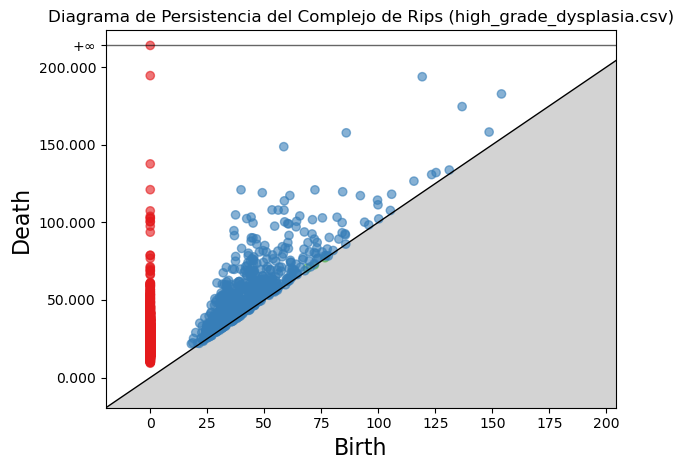

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 52, 'non-immune cells': 35, 'CD4 T cells': 3}
CellID: 103 tumor cells | Fenotipos de Vecinos: {'tumor cells': 56, 'M1 type macrophage': 10, 'CD4 T cells': 3, 'CD8 T cells': 3, 'non-immune cells': 2, 'dendritic cells': 1}
CellID: 141 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 38, 'non-immune cells': 18, 'likely-NKT cells': 12, 'CD8 T cells': 9, 'CD4 T cells': 8, 'dendritic cells': 6, 'M1 type macrophage': 2}
CellID: 193 tumor cells | Fenotipos de Vecinos: {'tumor cells': 43, 'non-immune cells': 11}
CellID: 211 tumor cells | Fenotipos de Vecinos: {'tumor cells': 93, 'M1 type macrophage': 7, 'CD4 T cells': 4, 'B cells': 1, 'CD8 T cells': 1, 'non-immune cells': 1}
CellID: 245 tumor cells | Fenotipos de Vecinos: {'tumor cells': 23}
CellID: 251 tumor cells | Fenotipos de Vecinos: {'tumor cells': 44, 'M1 type macrophage': 14, 'dendritic cells': 2, 'CD4 T cells': 2, 'CD8 T cells'

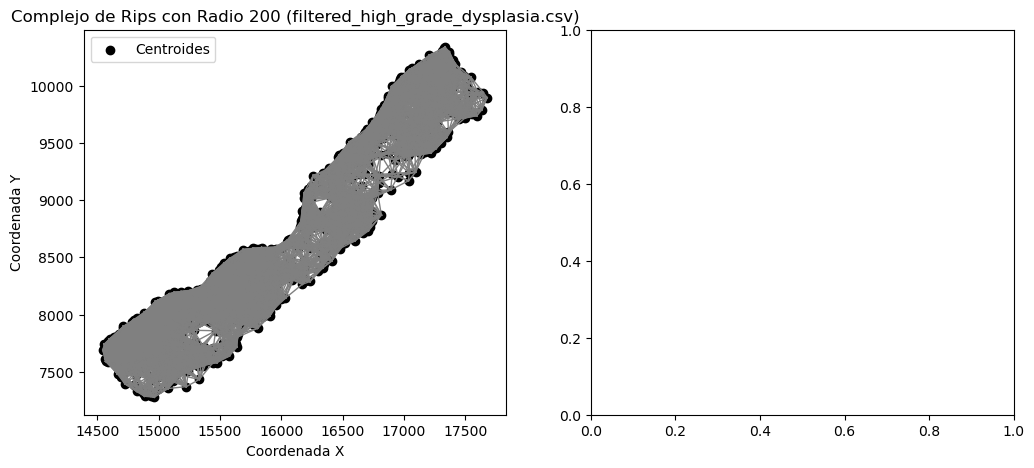

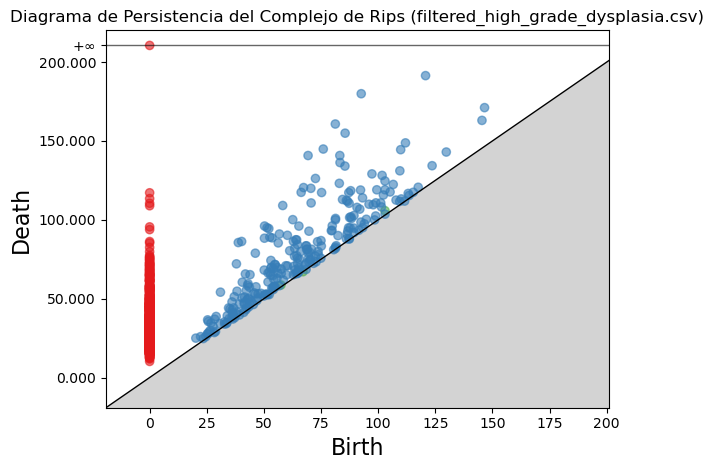

Archivo: filtered_high_grade_dysplasia.csv
CellID: 18 tumor cells | Fenotipos de Vecinos: {'tumor cells': 21, 'CD4 T cells': 7, 'M1 type macrophage': 2, 'CD8 T cells': 2}
CellID: 37 tumor cells | Fenotipos de Vecinos: {'tumor cells': 41, 'M1 type macrophage': 10, 'M2 type macrophage': 3, 'CD4 T cells': 2}
CellID: 107 M1 type macrophage | Fenotipos de Vecinos: {'M1 type macrophage': 16, 'tumor cells': 12, 'CD4 T cells': 2, 'CD8 T cells': 1, 'M2 type macrophage': 1}
CellID: 121 M1 type macrophage | Fenotipos de Vecinos: {'tumor cells': 39, 'M1 type macrophage': 6, 'M2 type macrophage': 4, 'CD4 T cells': 3}
CellID: 168 tumor cells | Fenotipos de Vecinos: {'tumor cells': 17, 'M1 type macrophage': 4}
CellID: 499 tumor cells | Fenotipos de Vecinos: {'tumor cells': 16, 'M1 type macrophage': 4}
CellID: 518 tumor cells | Fenotipos de Vecinos: {'tumor cells': 9, 'CD8 T cells': 2, 'CD4 T cells': 1, 'M1 type macrophage': 1}
CellID: 597 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 18, 'CD4 T

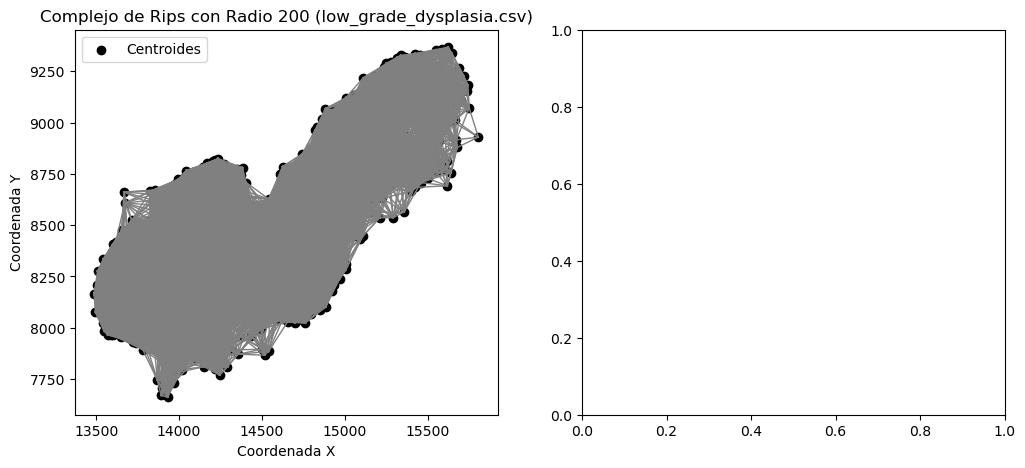

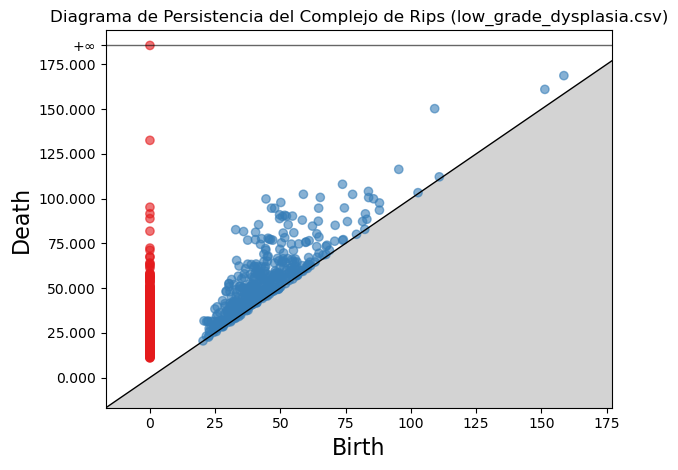

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 33, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 7, 'CD8 T cells': 6, 'likely-NKT cells': 5, 'M1 type macrophage': 4, 'NKT cells': 3}
CellID: 186 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 24, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 9, 'M1 type macrophage': 8, 'likely-NKT cells': 3, 'CD8 T cells': 3, 'NKT cells': 2, 'M2 type macrophage': 2, 'immune cells': 1}
CellID: 208 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 16, 'non-immune cells': 12, 'CD4 T cells': 11, 'NKT cells': 6, 'dendritic cells': 5, 'likely-NKT cells': 4, 'CD8 T cells': 2, 'M1 type macrophage': 1, 'M2 type macrophage': 1}
CellID: 274 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 35, 'non-immune cells': 10, 'NKT cells': 6, 'likely-NKT cells': 6, 'dendritic cells': 6, 'M1 type macrophage': 5, 'CD4 T cells': 1, 'M2 type macrophage': 1, 'immune cells': 1, 'CD8 T ce

In [24]:
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
radio_complejo_rips = 200
resultados = analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips)

In [27]:
for archivo, df_resultado in resultados.items():
    print(f'Resultados para {archivo}:')
    display(df_resultado)  
    print('\n')

Resultados para high_grade_dysplasia.csv:


CellID           Phenotype  non-immune cells  tumor cells  \
0         28    non-immune cells                35           52   
1        103         tumor cells                 2           56   
2        141    non-immune cells                18           38   
3        193         tumor cells                11           43   
4        211         tumor cells                 1           93   
...      ...                 ...               ...          ...   
2305   97168         tumor cells                 0           81   
2306   97297    non-immune cells                55           69   
2307   97315  M1 type macrophage                 7           14   
2308   97411         tumor cells                34           50   
2309   97454         tumor cells                 6           57   

      M1 type macrophage  CD4 T cells  likely-NKT cells  dendritic cells  \
0                      0            3                 0                0   
1                     10            3                 0                1   
2                      2            8                12                6   
3                      0            0                 0                0   
4                      7            4                 0                0   
...                  ...          ...               ...              ...   
2305                   0            0                 0                1   
2306                   3            6                 3                0   
2307                  15           11                 6                1   
2308                   0            2                 1                1   
2309                  13            5                10                3   

      CD8 T cells  NKT cells  B cells  T cells  
0               0          0        0        0  
1               3          0        0        0  
2               9          0        0        0  
3               0          0        0        0  
4               1          0        1        0  
...           ...        ...      ...      ...  
2305            2          0        0        0  
2306           10          2        0        0  
2307            5         18        0        1  
2308            6          0        0        0  
2309            3          6        0        0  

[2310 rows x 12 columns]



Resultados para filtered_high_grade_dysplasia.csv:


CellID           Phenotype  tumor cells  M1 type macrophage  CD4 T cells  \
0        18         tumor cells           21                   2            7   
1        37         tumor cells           41                  10            2   
2       107  M1 type macrophage           12                  16            2   
3       121  M1 type macrophage           39                   6            3   
4       168         tumor cells           17                   4            0   
..      ...                 ...          ...                 ...          ...   
908   75896  M1 type macrophage            9                  14            4   
909   75977         CD8 T cells            5                   4            9   
910   76167         tumor cells           24                   0            5   
911   76469  M2 type macrophage            7                   6           12   
912   76474         tumor cells           48                  11            1   

     CD8 T cells  M2 type macrophage  
0              2                   0  
1              0                   3  
2              1                   1  
3              0                   4  
4              0                   0  
..           ...                 ...  
908            8                   3  
909           15                  17  
910            0                   1  
911           18                  21  
912            1                   0  

[913 rows x 7 columns]



Resultados para low_grade_dysplasia.csv:


CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  
0             3        0             0                   0        0  
1             2        0             1                   2        0  
2             6        0             0                   1        0  
3             6        0             1                   1        0  
4             2        1             0                   0        0  
...         ...      ...           ...                 ...      ...  
1259          7        0             1                   1        0  
1260          1        1             0                   0        0  
1261          0        0             0                   0        0  
1262          1        1             0                   0        0  
1263          3        0             0                   0        1  

[1264 rows x 14 columns]

Ahora, pruebas para hacer que todos tengan un cantidad minima de vecinos 

In [8]:
def analizar_datos_complejo_rips_min(ruta_directorio, min_vecinos=8, radio_maximo=200, incremento_radio=5):
    """
    Lee los archivos CSV de un directorio, calcula los complejos de Rips ajustando el radio hasta que todas las células
    tengan al menos el número mínimo de vecinos, visualiza los resultados y guarda los datos de los vecinos en un DataFrame.

    :param ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    :param min_vecinos: Número mínimo de vecinos requeridos para cada célula.
    :param radio_maximo: Radio máximo permitido si no se cumple la condición de vecinos.
    :param incremento_radio: Incremento del radio en cada paso de la búsqueda.
    :return: Diccionario de DataFrames con información de los vecinos, uno por cada archivo.
    """
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
    # Inicializar un diccionario para almacenar los DataFrames de vecinos por archivo
    resultados_por_archivo = {}

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Visualización del Complejo de Rips y Diagrama de Persistencia
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_maximo)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        
        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Iniciar con un radio pequeño y aumentar gradualmente
        radio_actual = incremento_radio
        while radio_actual <= radio_maximo:
            # Calcular los vecinos para cada punto dentro del radio actual
            vecinos = kdtree.query_ball_point(puntos, radio_actual)
            
            # Verificar si todas las células tienen al menos min_vecinos vecinos
            cumplen_condicion = [len(celula_vecinos) - 1 >= min_vecinos for celula_vecinos in vecinos]  # -1 porque excluimos la célula en sí misma
            
            if all(cumplen_condicion):
                print(f"Todos los puntos tienen al menos {min_vecinos} vecinos a una distancia de {radio_actual}.")
                break
            
            # Incrementar el radio si no se cumple la condición
            radio_actual += incremento_radio

        # Si alcanzamos el radio máximo sin cumplir la condición, reportarlo
        if radio_actual > radio_maximo:
            print(f"No se alcanzó el número mínimo de vecinos ({min_vecinos}) para todas las células con un radio máximo de {radio_maximo}.")
            radio_actual = radio_maximo  # Fijar el radio actual al máximo permitido

        # Calcular los vecinos con el radio final determinado
        vecinos = kdtree.query_ball_point(puntos, radio_actual)
        
        # Identificar las células que no cumplieron con el número mínimo de vecinos
        celulas_no_cumplen = [i for i, cumple in enumerate(cumplen_condicion) if not cumple]
        if celulas_no_cumplen:
            print(f"Células que no cumplieron con el número mínimo de vecinos ({min_vecinos}):")
            for idx in celulas_no_cumplen:
                print(f"CellID: {df['CellID'].iloc[idx]}, Phenotype: {df['phenotype'].iloc[idx]}")
        
        # Calcular los fenotipos únicos de las células
        fenotipos_unicos = df['phenotype'].unique()

        # Inicializar un diccionario para los datos de vecinos
        datos_para_df = {'CellID': [], 'Phenotype': []}
        for fenotipo in fenotipos_unicos:
            datos_para_df[fenotipo] = []

        # Llenar el DataFrame con información de vecinos
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts().to_dict()
            
            # Añadir los datos de la célula actual al diccionario
            datos_para_df['CellID'].append(df["CellID"].iloc[i])
            datos_para_df['Phenotype'].append(df["phenotype"].iloc[i])
            
            # Llenar el número de vecinos de cada fenotipo, o 0 si no hay
            for fenotipo in fenotipos_unicos:
                datos_para_df[fenotipo].append(fenotipos_vecinos.get(fenotipo, 0))

        # Convertir el diccionario en un DataFrame y agregarlo al diccionario de resultados
        df_vecinos = pd.DataFrame(datos_para_df)
        resultados_por_archivo[archivo_csv] = df_vecinos

    return resultados_por_archivo


/opt/conda/envs/umap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


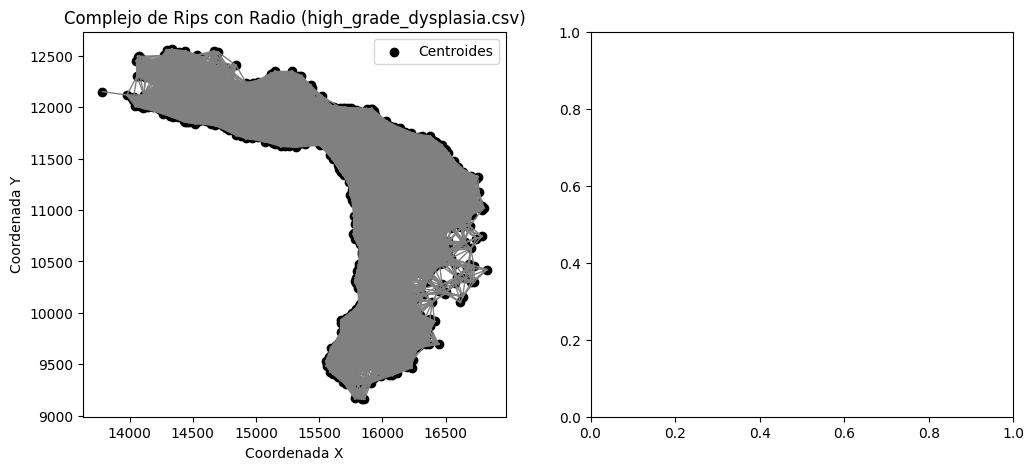

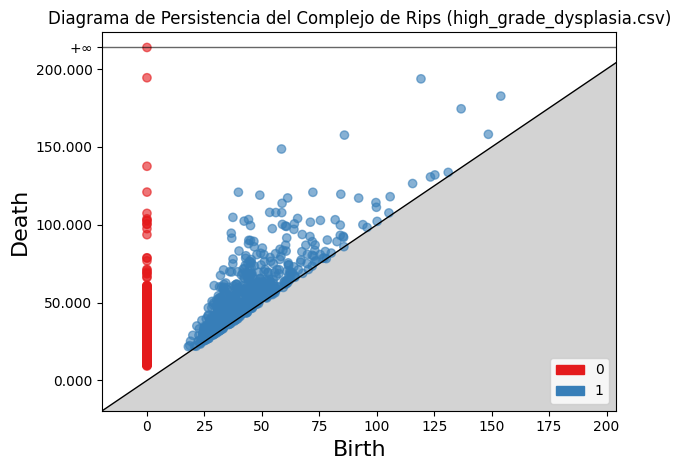

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 12563, Phenotype: M1 type macrophage
CellID: 34461, Phenotype: non-immune cells
CellID: 50919, Phenotype: non-immune cells
CellID: 60472, Phenotype: tumor cells


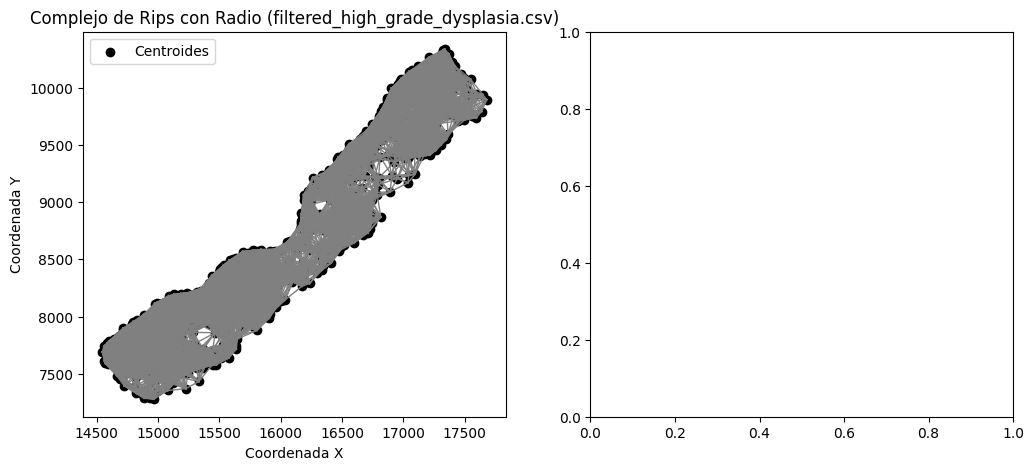

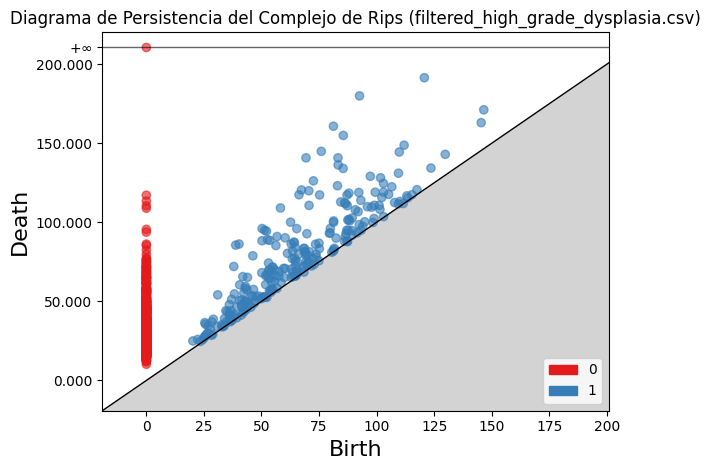

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 41283, Phenotype: M2 type macrophage


/opt/conda/envs/umap/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


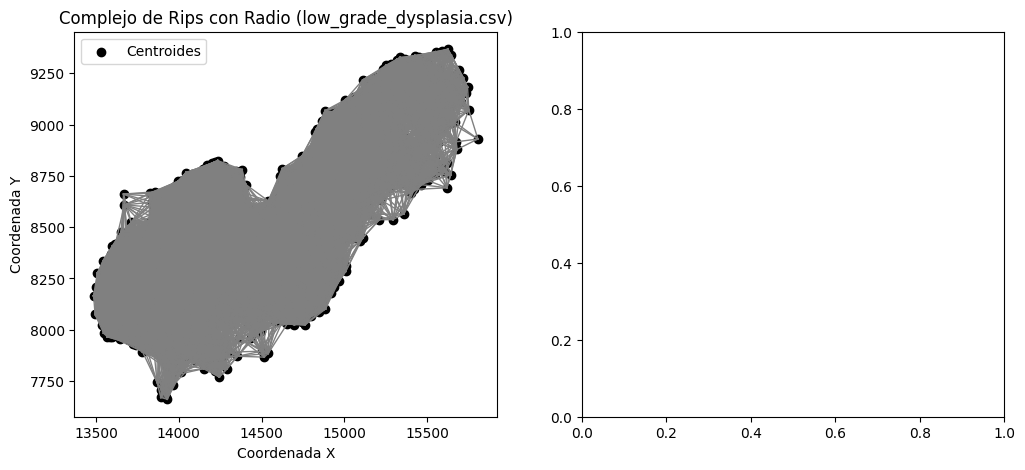

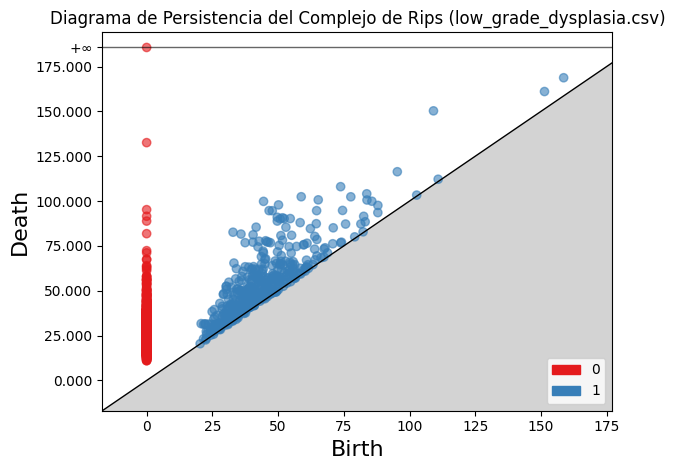

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 7611, Phenotype: non-immune cells


In [9]:
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
min_vecinos = 8
radio_maximo = 200
incremento_radio = 5
resultados = analizar_datos_complejo_rips_min(ruta_directorio, min_vecinos, radio_maximo, incremento_radio)

In [37]:
for archivo, df_resultado in resultados.items():
    print(f'Resultados para {archivo}:')
    display(df_resultado)  
    print('\n')

Resultados para high_grade_dysplasia.csv:


CellID           Phenotype  non-immune cells  tumor cells  \
0         28    non-immune cells                35           52   
1        103         tumor cells                 2           56   
2        141    non-immune cells                18           38   
3        193         tumor cells                11           43   
4        211         tumor cells                 1           93   
...      ...                 ...               ...          ...   
2305   97168         tumor cells                 0           81   
2306   97297    non-immune cells                55           69   
2307   97315  M1 type macrophage                 7           14   
2308   97411         tumor cells                34           50   
2309   97454         tumor cells                 6           57   

      M1 type macrophage  CD4 T cells  likely-NKT cells  dendritic cells  \
0                      0            3                 0                0   
1                     10            3                 0                1   
2                      2            8                12                6   
3                      0            0                 0                0   
4                      7            4                 0                0   
...                  ...          ...               ...              ...   
2305                   0            0                 0                1   
2306                   3            6                 3                0   
2307                  15           11                 6                1   
2308                   0            2                 1                1   
2309                  13            5                10                3   

      CD8 T cells  NKT cells  B cells  T cells  
0               0          0        0        0  
1               3          0        0        0  
2               9          0        0        0  
3               0          0        0        0  
4               1          0        1        0  
...           ...        ...      ...      ...  
2305            2          0        0        0  
2306           10          2        0        0  
2307            5         18        0        1  
2308            6          0        0        0  
2309            3          6        0        0  

[2310 rows x 12 columns]



Resultados para filtered_high_grade_dysplasia.csv:


CellID           Phenotype  tumor cells  M1 type macrophage  CD4 T cells  \
0        18         tumor cells           21                   2            7   
1        37         tumor cells           41                  10            2   
2       107  M1 type macrophage           12                  16            2   
3       121  M1 type macrophage           39                   6            3   
4       168         tumor cells           17                   4            0   
..      ...                 ...          ...                 ...          ...   
908   75896  M1 type macrophage            9                  14            4   
909   75977         CD8 T cells            5                   4            9   
910   76167         tumor cells           24                   0            5   
911   76469  M2 type macrophage            7                   6           12   
912   76474         tumor cells           48                  11            1   

     CD8 T cells  M2 type macrophage  
0              2                   0  
1              0                   3  
2              1                   1  
3              0                   4  
4              0                   0  
..           ...                 ...  
908            8                   3  
909           15                  17  
910            0                   1  
911           18                  21  
912            1                   0  

[913 rows x 7 columns]



Resultados para low_grade_dysplasia.csv:


CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  
0             3        0             0                   0        0  
1             2        0             1                   2        0  
2             6        0             0                   1        0  
3             6        0             1                   1        0  
4             2        1             0                   0        0  
...         ...      ...           ...                 ...      ...  
1259          7        0             1                   1        0  
1260          1        1             0                   0        0  
1261          0        0             0                   0        0  
1262          1        1             0                   0        0  
1263          3        0             0                   0        1  

[1264 rows x 14 columns]

Agregar para poder manipular los dataframes 

In [55]:
def analizar_datos_complejo_rips_min_2(ruta_directorio, min_vecinos=8, radio_maximo=200, incremento_radio=5):
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    resultados_por_archivo = {}

    for archivo_csv in archivos_csv:
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        X = df['X_centroid']
        Y = df['Y_centroid']
        puntos = np.array(list(zip(X, Y)))

        # Visualización del Complejo de Rips y Diagrama de Persistencia
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_maximo)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):
            if len(simplex[0]) == 2:
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        diag = simplex_tree.persistence()
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')
        plt.tight_layout()
        plt.show()

        # Usar KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)
        radio_actual = incremento_radio
        while radio_actual <= radio_maximo:
            vecinos = kdtree.query_ball_point(puntos, radio_actual)
            cumplen_condicion = [len(celula_vecinos) - 1 >= min_vecinos for celula_vecinos in vecinos]
            if all(cumplen_condicion):
                print(f"Todos los puntos tienen al menos {min_vecinos} vecinos a una distancia de {radio_actual}.")
                break
            radio_actual += incremento_radio

        if radio_actual > radio_maximo:
            print(f"No se alcanzó el número mínimo de vecinos ({min_vecinos}) para todas las células con un radio máximo de {radio_maximo}.")
            radio_actual = radio_maximo

        vecinos = kdtree.query_ball_point(puntos, radio_actual)
        celulas_no_cumplen = [i for i, cumple in enumerate(cumplen_condicion) if not cumple]
        if celulas_no_cumplen:
            print(f"Células que no cumplieron con el número mínimo de vecinos ({min_vecinos}):")
            for idx in celulas_no_cumplen:
                print(f"CellID: {df['CellID'].iloc[idx]}, Phenotype: {df['phenotype'].iloc[idx]}")

        fenotipos_unicos = df['phenotype'].unique()
        datos_para_df = {'CellID': [], 'Phenotype': []}
        for fenotipo in fenotipos_unicos:
            datos_para_df[fenotipo] = []

        for i, celula_vecinos in enumerate(vecinos):
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts().to_dict()
            datos_para_df['CellID'].append(df["CellID"].iloc[i])
            datos_para_df['Phenotype'].append(df["phenotype"].iloc[i])
            for fenotipo in fenotipos_unicos:
                datos_para_df[fenotipo].append(fenotipos_vecinos.get(fenotipo, 0))

        df_vecinos = pd.DataFrame(datos_para_df)
        resultados_por_archivo[archivo_csv] = df_vecinos

    return resultados_por_archivo


def mostrar_resultado_por_archivo(archivo):
    """
    Muestra el DataFrame de resultados para un archivo específico.
    
    :param archivo: El nombre del archivo (clave en el diccionario de resultados).
    """
    if archivo in resultados:
        display(resultados[archivo])  
    else:
        print(f"El archivo '{archivo}' no se encuentra en los resultados.")

def agregar_columna_a_resultado(archivo, nombre_columna, valor_default):
    """
    Agrega una nueva columna a un DataFrame de resultados de un archivo específico.

    :param archivo: El nombre del archivo (clave en el diccionario de resultados).
    :param nombre_columna: El nombre de la nueva columna a agregar.
    :param valor_default: El valor por defecto o un cálculo para llenar la nueva columna.
    """
    if archivo in resultados:
      
        df_resultado = resultados[archivo]
        df_resultado[nombre_columna] = valor_default
        resultados[archivo] = df_resultado
        #df_resultado[nombre_columna] = df_resultado['ColumnaExistente'] * 2  # Ejemplo de cálculo
        display(resultados[archivo])
    else:
        print(f"El archivo '{archivo}' no se encuentra en los resultados.")



def eliminar_columna_de_resultado(archivo, nombre_columna):
    """
    Elimina una columna de un DataFrame de resultados de un archivo específico.

    :param archivo: El nombre del archivo (clave en el diccionario de resultados).
    :param nombre_columna: El nombre de la columna a eliminar.
    """
    if archivo in resultados:
        # Obtener el DataFrame correspondiente al archivo
        df_resultado = resultados[archivo]
        
        # Verificar si la columna existe en el DataFrame
        if nombre_columna in df_resultado.columns:
            # Eliminar la columna
            df_resultado.drop(columns=[nombre_columna], inplace=True)
            
            # Guardar los cambios en el diccionario de resultados
            resultados[archivo] = df_resultado
            
            # Mostrar el DataFrame actualizado
            display(resultados[archivo])
        else:
            print(f"La columna '{nombre_columna}' no existe en el DataFrame del archivo '{archivo}'.")
    else:
        print(f"El archivo '{archivo}' no se encuentra en los resultados.")

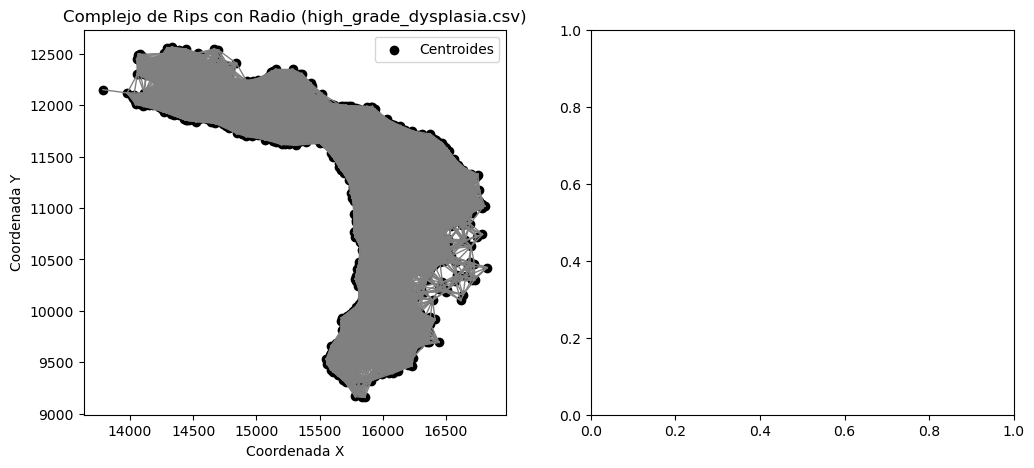

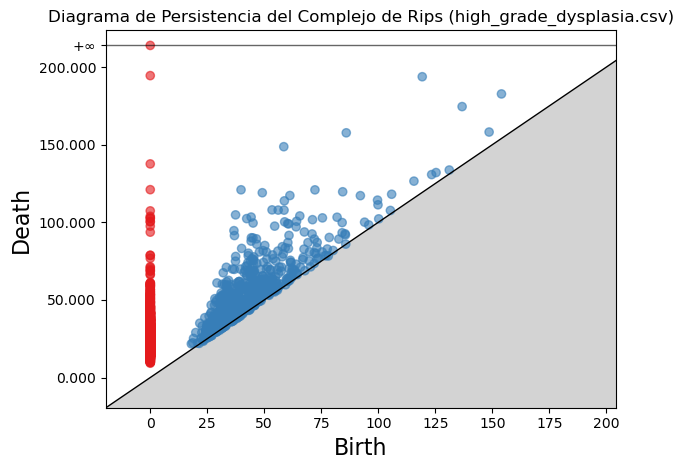

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 12563, Phenotype: M1 type macrophage
CellID: 34461, Phenotype: non-immune cells
CellID: 50919, Phenotype: non-immune cells
CellID: 60472, Phenotype: tumor cells


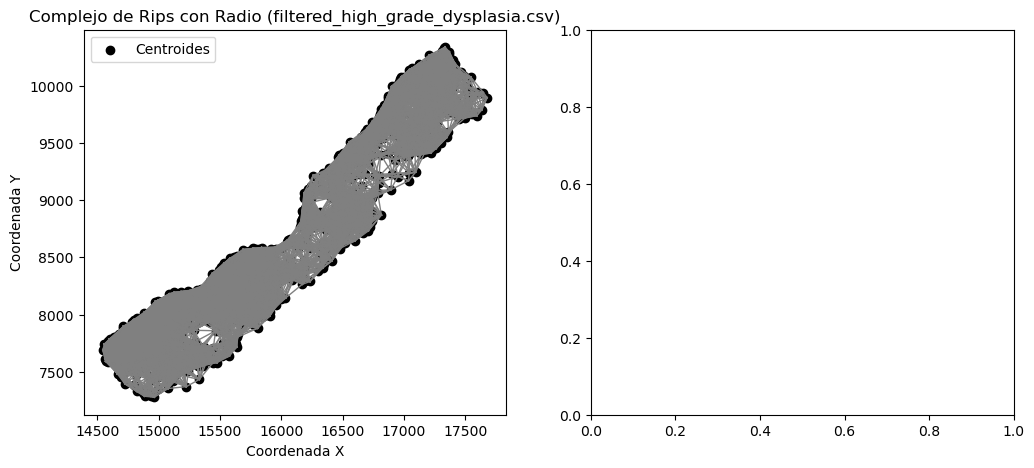

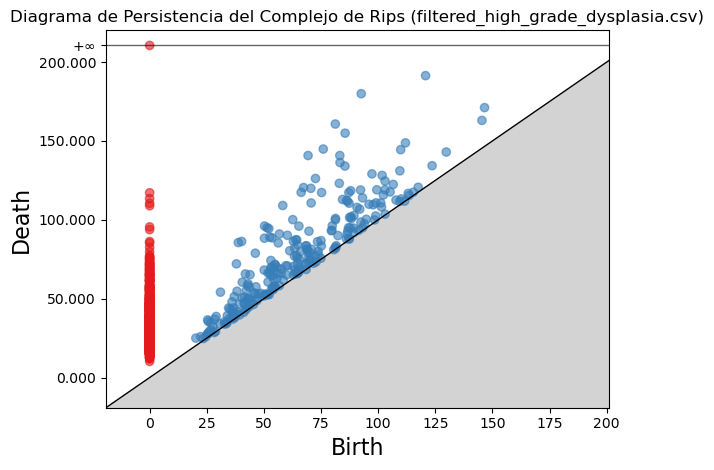

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 41283, Phenotype: M2 type macrophage


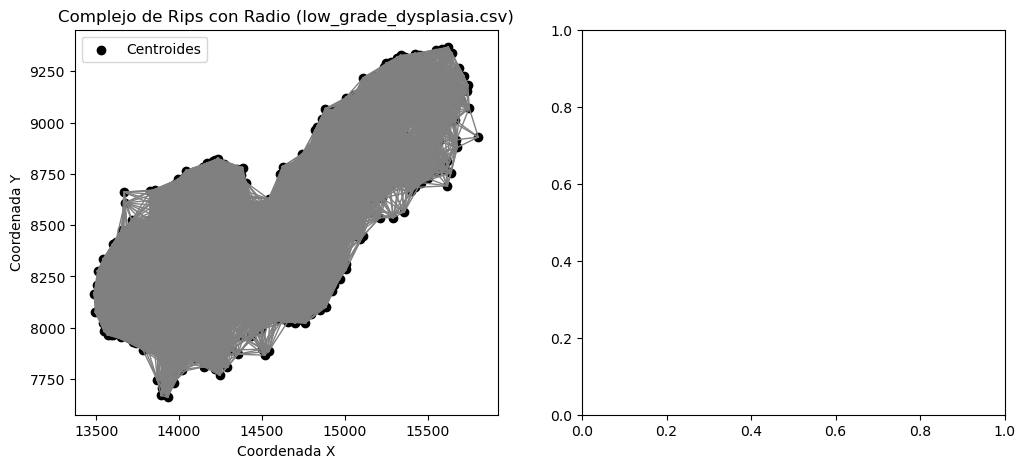

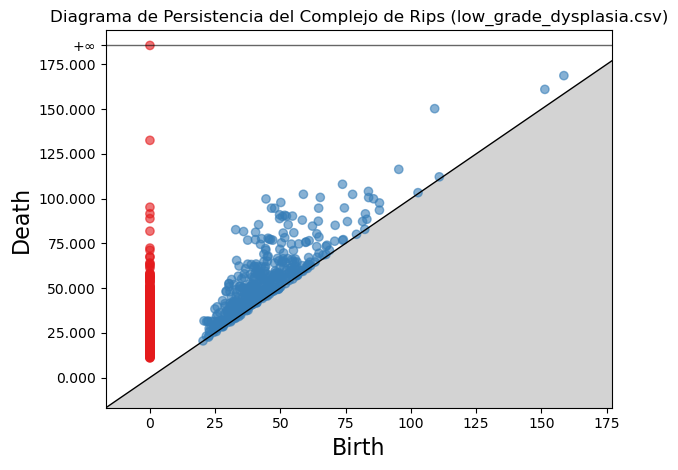

No se alcanzó el número mínimo de vecinos (8) para todas las células con un radio máximo de 200.
Células que no cumplieron con el número mínimo de vecinos (8):
CellID: 7611, Phenotype: non-immune cells


In [42]:
# Usar la función para analizar los datos
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
min_vecinos = 8
radio_maximo = 200
incremento_radio = 5
resultados = analizar_datos_complejo_rips_min_2(ruta_directorio, min_vecinos, radio_maximo, incremento_radio)

In [43]:
for archivo, df_resultado in resultados.items():
    print(f'Resultados para {archivo}:')
    display(df_resultado)  
    print('\n')

Resultados para high_grade_dysplasia.csv:


CellID           Phenotype  non-immune cells  tumor cells  \
0         28    non-immune cells                35           52   
1        103         tumor cells                 2           56   
2        141    non-immune cells                18           38   
3        193         tumor cells                11           43   
4        211         tumor cells                 1           93   
...      ...                 ...               ...          ...   
2305   97168         tumor cells                 0           81   
2306   97297    non-immune cells                55           69   
2307   97315  M1 type macrophage                 7           14   
2308   97411         tumor cells                34           50   
2309   97454         tumor cells                 6           57   

      M1 type macrophage  CD4 T cells  likely-NKT cells  dendritic cells  \
0                      0            3                 0                0   
1                     10            3                 0                1   
2                      2            8                12                6   
3                      0            0                 0                0   
4                      7            4                 0                0   
...                  ...          ...               ...              ...   
2305                   0            0                 0                1   
2306                   3            6                 3                0   
2307                  15           11                 6                1   
2308                   0            2                 1                1   
2309                  13            5                10                3   

      CD8 T cells  NKT cells  B cells  T cells  
0               0          0        0        0  
1               3          0        0        0  
2               9          0        0        0  
3               0          0        0        0  
4               1          0        1        0  
...           ...        ...      ...      ...  
2305            2          0        0        0  
2306           10          2        0        0  
2307            5         18        0        1  
2308            6          0        0        0  
2309            3          6        0        0  

[2310 rows x 12 columns]



Resultados para filtered_high_grade_dysplasia.csv:


CellID           Phenotype  tumor cells  M1 type macrophage  CD4 T cells  \
0        18         tumor cells           21                   2            7   
1        37         tumor cells           41                  10            2   
2       107  M1 type macrophage           12                  16            2   
3       121  M1 type macrophage           39                   6            3   
4       168         tumor cells           17                   4            0   
..      ...                 ...          ...                 ...          ...   
908   75896  M1 type macrophage            9                  14            4   
909   75977         CD8 T cells            5                   4            9   
910   76167         tumor cells           24                   0            5   
911   76469  M2 type macrophage            7                   6           12   
912   76474         tumor cells           48                  11            1   

     CD8 T cells  M2 type macrophage  
0              2                   0  
1              0                   3  
2              1                   1  
3              0                   4  
4              0                   0  
..           ...                 ...  
908            8                   3  
909           15                  17  
910            0                   1  
911           18                  21  
912            1                   0  

[913 rows x 7 columns]



Resultados para low_grade_dysplasia.csv:


CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  
0             3        0             0                   0        0  
1             2        0             1                   2        0  
2             6        0             0                   1        0  
3             6        0             1                   1        0  
4             2        1             0                   0        0  
...         ...      ...           ...                 ...      ...  
1259          7        0             1                   1        0  
1260          1        1             0                   0        0  
1261          0        0             0                   0        0  
1262          1        1             0                   0        0  
1263          3        0             0                   0        1  

[1264 rows x 14 columns]

In [51]:
archivo_a_mostrar = "low_grade_dysplasia.csv"  
mostrar_resultado_por_archivo(archivo_a_mostrar)

CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  \
0             3        0             0                   0        0   
1             2        0             1                   2        0   
2             6        0             0                   1        0   
3             6        0             1                   1        0   
4             2        1             0                   0        0   
...         ...      ...           ...                 ...      ...   
1259          7        0             1                   1        0   
1260          1        1             0                   0        0   
1261          0        0             0                   0        0   
1262          1        1             0                   0        0   
1263          3        0             0                   0        1   

      NuevoValor  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
1259           1  
1260           1  
1261           1  
1262           1  
1263           1  

[1264 rows x 15 columns]

In [48]:
agregar_columna_a_resultado(archivo_a_mostrar, 'NuevoValor', 1)

CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  \
0             3        0             0                   0        0   
1             2        0             1                   2        0   
2             6        0             0                   1        0   
3             6        0             1                   1        0   
4             2        1             0                   0        0   
...         ...      ...           ...                 ...      ...   
1259          7        0             1                   1        0   
1260          1        1             0                   0        0   
1261          0        0             0                   0        0   
1262          1        1             0                   0        0   
1263          3        0             0                   0        1   

      NuevoValor  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
1259           1  
1260           1  
1261           1  
1262           1  
1263           1  

[1264 rows x 15 columns]

In [54]:
archivo_a_mostrar = "low_grade_dysplasia.csv"
eliminar_columna_de_resultado(archivo_a_mostrar, 'NuevoValor')

CellID         Phenotype  CD8 T cells  non-immune cells  CD4 T cells  \
0         87       CD8 T cells            6                11           10   
1        186  non-immune cells            3                11           10   
2        208       CD4 T cells            2                12           11   
3        274       CD8 T cells            1                10            1   
4        387  non-immune cells            7                 7            3   
...      ...               ...          ...               ...          ...   
1259   96234       tumor cells            2                16           13   
1260   96574       tumor cells           11                 8           10   
1261   96901       tumor cells            3                 4            3   
1262   97160  non-immune cells           17                14            4   
1263   97442       tumor cells            3                 5            6   

      tumor cells  M1 type macrophage  dendritic cells  likely-NKT cells  \
0              33                   4                7                 5   
1              24                   8                9                 3   
2              16                   1                5                 4   
3              35                   5                6                 6   
4              32                   4                3                 3   
...           ...                 ...              ...               ...   
1259           26                   3               12                 4   
1260           47                   7                3                 5   
1261           64                  17                1                 0   
1262           99                   7                4                 5   
1263           76                  30                3                 5   

      NKT cells  B cells  immune cells  M2 type macrophage  T cells  
0             3        0             0                   0        0  
1             2        0             1                   2        0  
2             6        0             0                   1        0  
3             6        0             1                   1        0  
4             2        1             0                   0        0  
...         ...      ...           ...                 ...      ...  
1259          7        0             1                   1        0  
1260          1        1             0                   0        0  
1261          0        0             0                   0        0  
1262          1        1             0                   0        0  
1263          3        0             0                   0        1  

[1264 rows x 14 columns]

ver porcentajes de los fenotipos 

In [8]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from scipy.spatial import KDTree

def calcular_vecinos_por_fenotipo(df_vecinos, fenotipos_unicos):
    """
    Calcula la cantidad de vecinos de otros fenotipos para cada fenotipo específico.

    :param df_vecinos: DataFrame con los datos de vecinos.
    :param fenotipos_unicos: Lista de fenotipos únicos.
    :return: DataFrame con columnas adicionales que representan las cantidades de vecinos por fenotipo.
    """
    # Inicializar un diccionario para almacenar los resultados
    resultados_fenotipos = {fenotipo: {f'Vecinos_{otro_fenotipo}': 0 for otro_fenotipo in fenotipos_unicos} for fenotipo in fenotipos_unicos}

    for index, row in df_vecinos.iterrows():
        fenotipo_actual = row['Phenotype']
        
        for fenotipo in fenotipos_unicos:
            resultados_fenotipos[fenotipo_actual][f'Vecinos_{fenotipo}'] += row[fenotipo]
    
    # Convertir los resultados en un DataFrame
    df_resultados_fenotipos = pd.DataFrame(resultados_fenotipos).T
    
    # Calcular los porcentajes
    for fenotipo in fenotipos_unicos:
        total_vecinos = df_resultados_fenotipos.loc[fenotipo].sum()
        if total_vecinos > 0:
            df_resultados_fenotipos.loc[fenotipo] = (df_resultados_fenotipos.loc[fenotipo] / total_vecinos) * 100

    return df_resultados_fenotipos

def analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips=200):
    """
    Lee los archivos CSV de un directorio, calcula los complejos de Rips y los vecinos dentro de un radio dado,
    visualiza los resultados y guarda los datos de los vecinos en un DataFrame.

    :param ruta_directorio: Ruta del directorio que contiene los archivos CSV.
    :param radio_complejo_rips: Radio para calcular el complejo de Rips y los vecinos.
    :return: Diccionario de DataFrames con información de los vecinos, uno por cada archivo.
    """
    # Obtener una lista de todos los archivos CSV en la ruta especificada
    archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]
    
    # Inicializar un diccionario para almacenar los DataFrames de vecinos por archivo
    resultados_por_archivo = {}

    # Iterar sobre cada archivo CSV
    for archivo_csv in archivos_csv:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa)
        nombres_columnas = ['CellID', 'X_centroid', 'Y_centroid', 'phenotype']
        df.columns = nombres_columnas
        
        # Extraer las coordenadas de los centroides
        X = df['X_centroid']
        Y = df['Y_centroid']
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(X, Y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=radio_complejo_rips)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(X, Y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [X[i] for i in arista]
                y = [Y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio {radio_complejo_rips} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia del Complejo de Rips ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

        # ---- Nueva sección para calcular los vecinos ----
        # Usar un KDTree para calcular los vecinos de cada punto
        kdtree = KDTree(puntos)

        # Definir el radio para considerar a un punto como vecino
        radio_vecinos = radio_complejo_rips  # Usar el mismo radio utilizado para el complejo de Rips

        # Calcular los vecinos para cada punto dentro del radio
        vecinos = kdtree.query_ball_point(puntos, radio_vecinos)

        # Calcular los fenotipos únicos de las células
        fenotipos_unicos = df['phenotype'].unique()

        # Inicializar un diccionario para los datos de vecinos
        datos_para_df = {'CellID': [], 'Phenotype': []}
        for fenotipo in fenotipos_unicos:
            datos_para_df[fenotipo] = []

        # Mostrar resultados para cada célula
        print(f'Archivo: {archivo_csv}')
        for i, celula_vecinos in enumerate(vecinos):
            # Remover la célula en sí misma de la lista de vecinos
            celula_vecinos = [idx for idx in celula_vecinos if idx != i]
            
            # Obtener los fenotipos de los vecinos y contar cuántos hay de cada tipo
            fenotipos_vecinos = df.loc[celula_vecinos, 'phenotype'].value_counts().to_dict()
            
            # Añadir los datos de la célula actual al diccionario
            datos_para_df['CellID'].append(df["CellID"].iloc[i])
            datos_para_df['Phenotype'].append(df["phenotype"].iloc[i])
            
            # Llenar el número de vecinos de cada fenotipo, o 0 si no hay
            for fenotipo in fenotipos_unicos:
                datos_para_df[fenotipo].append(fenotipos_vecinos.get(fenotipo, 0))
            
            print(f'CellID: {df["CellID"].iloc[i]} {df["phenotype"].iloc[i]} | Fenotipos de Vecinos: {fenotipos_vecinos}')
        print('-----------------------------------------\n')

        # Convertir el diccionario en un DataFrame y agregarlo al diccionario de resultados
        df_vecinos = pd.DataFrame(datos_para_df)

        # Calcular las cantidades y porcentajes de vecinos por fenotipo
        df_resultados_fenotipos = calcular_vecinos_por_fenotipo(df_vecinos, fenotipos_unicos)
        
        # Almacenar el DataFrame en el diccionario de resultados
        resultados_por_archivo[archivo_csv] = df_resultados_fenotipos

    return resultados_por_archivo

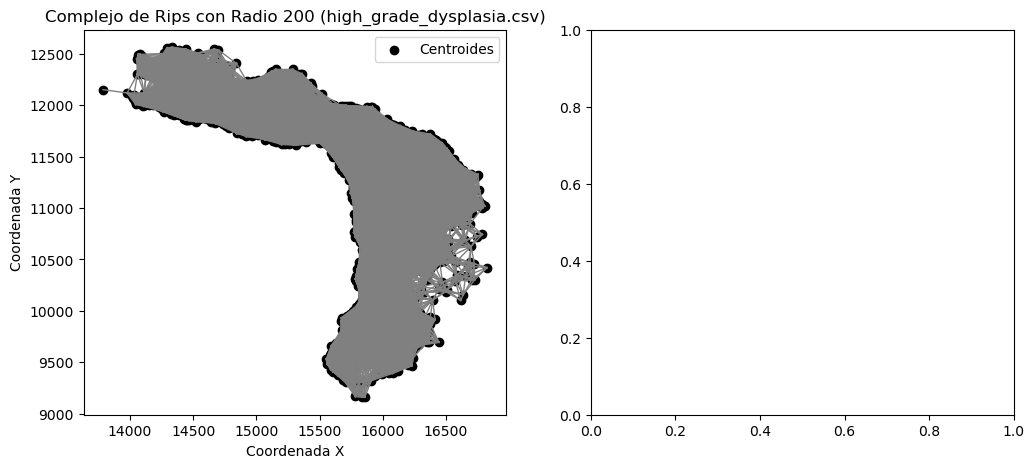

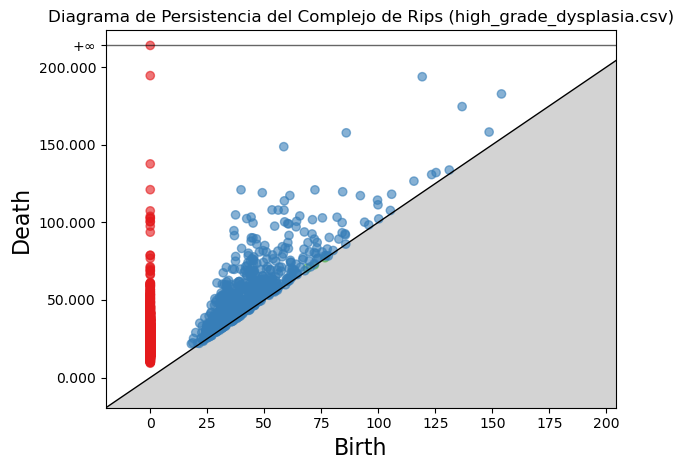

Archivo: high_grade_dysplasia.csv
CellID: 28 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 52, 'non-immune cells': 35, 'CD4 T cells': 3}
CellID: 103 tumor cells | Fenotipos de Vecinos: {'tumor cells': 56, 'M1 type macrophage': 10, 'CD4 T cells': 3, 'CD8 T cells': 3, 'non-immune cells': 2, 'dendritic cells': 1}
CellID: 141 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 38, 'non-immune cells': 18, 'likely-NKT cells': 12, 'CD8 T cells': 9, 'CD4 T cells': 8, 'dendritic cells': 6, 'M1 type macrophage': 2}
CellID: 193 tumor cells | Fenotipos de Vecinos: {'tumor cells': 43, 'non-immune cells': 11}
CellID: 211 tumor cells | Fenotipos de Vecinos: {'tumor cells': 93, 'M1 type macrophage': 7, 'CD4 T cells': 4, 'B cells': 1, 'CD8 T cells': 1, 'non-immune cells': 1}
CellID: 245 tumor cells | Fenotipos de Vecinos: {'tumor cells': 23}
CellID: 251 tumor cells | Fenotipos de Vecinos: {'tumor cells': 44, 'M1 type macrophage': 14, 'dendritic cells': 2, 'CD4 T cells': 2, 'CD8 T cells'

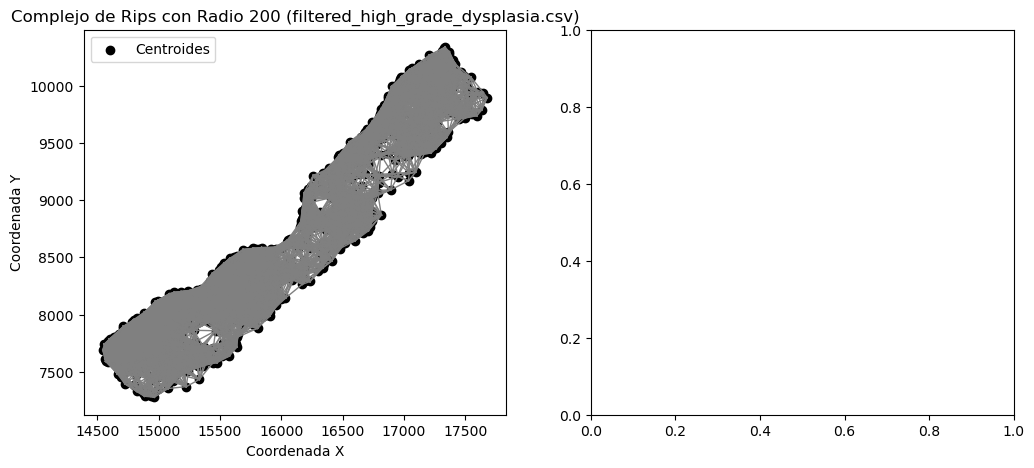

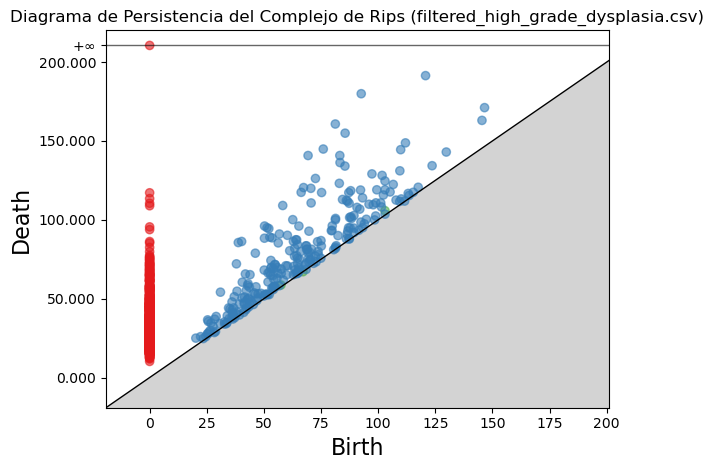

Archivo: filtered_high_grade_dysplasia.csv
CellID: 18 tumor cells | Fenotipos de Vecinos: {'tumor cells': 21, 'CD4 T cells': 7, 'M1 type macrophage': 2, 'CD8 T cells': 2}
CellID: 37 tumor cells | Fenotipos de Vecinos: {'tumor cells': 41, 'M1 type macrophage': 10, 'M2 type macrophage': 3, 'CD4 T cells': 2}
CellID: 107 M1 type macrophage | Fenotipos de Vecinos: {'M1 type macrophage': 16, 'tumor cells': 12, 'CD4 T cells': 2, 'CD8 T cells': 1, 'M2 type macrophage': 1}
CellID: 121 M1 type macrophage | Fenotipos de Vecinos: {'tumor cells': 39, 'M1 type macrophage': 6, 'M2 type macrophage': 4, 'CD4 T cells': 3}
CellID: 168 tumor cells | Fenotipos de Vecinos: {'tumor cells': 17, 'M1 type macrophage': 4}
CellID: 499 tumor cells | Fenotipos de Vecinos: {'tumor cells': 16, 'M1 type macrophage': 4}
CellID: 518 tumor cells | Fenotipos de Vecinos: {'tumor cells': 9, 'CD8 T cells': 2, 'CD4 T cells': 1, 'M1 type macrophage': 1}
CellID: 597 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 18, 'CD4 T

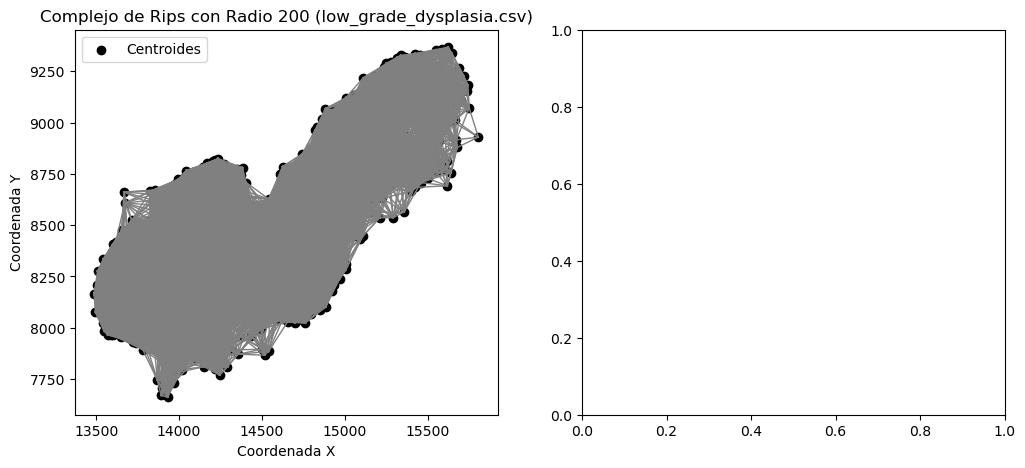

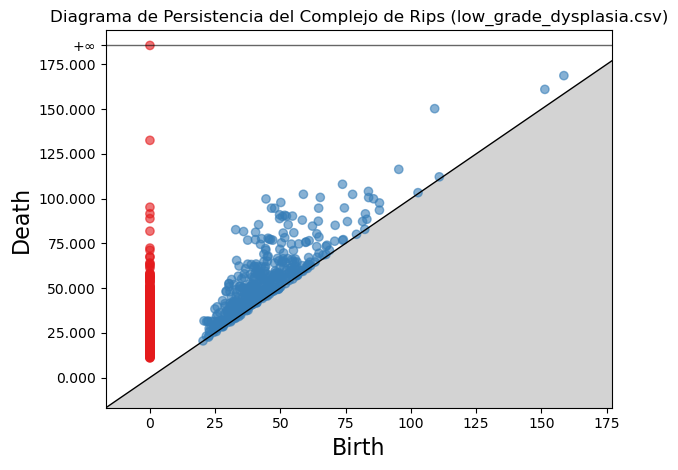

Archivo: low_grade_dysplasia.csv
CellID: 87 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 33, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 7, 'CD8 T cells': 6, 'likely-NKT cells': 5, 'M1 type macrophage': 4, 'NKT cells': 3}
CellID: 186 non-immune cells | Fenotipos de Vecinos: {'tumor cells': 24, 'non-immune cells': 11, 'CD4 T cells': 10, 'dendritic cells': 9, 'M1 type macrophage': 8, 'likely-NKT cells': 3, 'CD8 T cells': 3, 'NKT cells': 2, 'M2 type macrophage': 2, 'immune cells': 1}
CellID: 208 CD4 T cells | Fenotipos de Vecinos: {'tumor cells': 16, 'non-immune cells': 12, 'CD4 T cells': 11, 'NKT cells': 6, 'dendritic cells': 5, 'likely-NKT cells': 4, 'CD8 T cells': 2, 'M1 type macrophage': 1, 'M2 type macrophage': 1}
CellID: 274 CD8 T cells | Fenotipos de Vecinos: {'tumor cells': 35, 'non-immune cells': 10, 'NKT cells': 6, 'likely-NKT cells': 6, 'dendritic cells': 6, 'M1 type macrophage': 5, 'CD4 T cells': 1, 'M2 type macrophage': 1, 'immune cells': 1, 'CD8 T ce

In [9]:
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/datos_c"
radio_complejo_rips = 200
resultados = analizar_datos_complejo_rips(ruta_directorio, radio_complejo_rips)


In [10]:
for archivo, df_resultado in resultados.items():
    print(f'Resultados para {archivo}:')
    display(df_resultado)  
    print('\n')

Resultados para high_grade_dysplasia.csv:


Vecinos_non-immune cells  Vecinos_tumor cells  \
non-immune cells                   41.958317            40.174007   
tumor cells                        14.185173            68.636588   
M1 type macrophage                  9.191919            45.346801   
CD4 T cells                        11.210112            38.831330   
likely-NKT cells                   28.362306            38.902104   
dendritic cells                    10.685694            51.200835   
CD8 T cells                        27.459527            39.881694   
NKT cells                          19.386835            31.950706   
B cells                             3.526448            54.659950   
T cells                             3.773585             0.000000   

                    Vecinos_M1 type macrophage  Vecinos_CD4 T cells  \
non-immune cells                      3.354797             3.988891   
tumor cells                           5.843812             4.878811   
M1 type macrophage                   18.814815            16.430976   
CD4 T cells                          16.853157            21.688078   
likely-NKT cells                      6.276304             5.233303   
dendritic cells                       7.970762            15.245388   
CD8 T cells                           7.285181             8.577210   
NKT cells                            11.632101             8.716561   
B cells                              19.647355            18.891688   
T cells                              22.641509            24.528302   

                    Vecinos_likely-NKT cells  Vecinos_dendritic cells  \
non-immune cells                    3.809477                 0.754522   
tumor cells                         1.844958                 1.276544   
M1 type macrophage                  2.309764                 1.542088   
CD4 T cells                         1.975411                 3.025280   
likely-NKT cells                    7.282708                 1.811528   
dendritic cells                     3.445875                 5.638705   
CD8 T cells                         5.837484                 1.727895   
NKT cells                           8.476105                 1.562970   
B cells                             0.000000                 0.755668   
T cells                            11.320755                 1.886792   

                    Vecinos_CD8 T cells  Vecinos_NKT cells  Vecinos_B cells  \
non-immune cells               4.335431           1.585234         0.034408   
tumor cells                    2.223321           0.922479         0.188314   
M1 type macrophage             3.151515           2.606061         0.525253   
CD4 T cells                    3.805774           2.003039         0.518027   
likely-NKT cells               6.861848           5.160110         0.000000   
dendritic cells                3.863557           1.809955         0.104420   
CD8 T cells                    6.537983           2.506227         0.124533   
NKT cells                      4.839194          12.984671         0.000000   
B cells                        2.015113           0.000000         0.503778   
T cells                        7.547170          28.301887         0.000000   

                    Vecinos_T cells  
non-immune cells           0.004915  
tumor cells                0.000000  
M1 type macrophage         0.080808  
CD4 T cells                0.089791  
likely-NKT cells           0.109790  
dendritic cells            0.034807  
CD8 T cells                0.062267  
NKT cells                  0.450857  
B cells                    0.000000  
T cells                    0.000000



Resultados para filtered_high_grade_dysplasia.csv:


Vecinos_tumor cells  Vecinos_M1 type macrophage  \
tumor cells                   63.530216                   18.232044   
M1 type macrophage            27.750325                   42.964889   
CD4 T cells                   35.127653                   23.315903   
CD8 T cells                   23.839157                   27.453327   
M2 type macrophage            23.379477                   32.366513   

                    Vecinos_CD4 T cells  Vecinos_CD8 T cells  \
tumor cells                    6.504528             5.672951   
M1 type macrophage             6.571305             9.943650   
CD4 T cells                   12.796063            14.703168   
CD8 T cells                   11.440881            20.823360   
M2 type macrophage            10.041749            15.095583   

                    Vecinos_M2 type macrophage  
tumor cells                           6.060261  
M1 type macrophage                   12.769831  
CD4 T cells                          14.057213  
CD8 T cells                          16.443274  
M2 type macrophage                   19.116678



Resultados para low_grade_dysplasia.csv:


Vecinos_CD8 T cells  Vecinos_non-immune cells  \
CD8 T cells                   10.108405                 10.192876   
non-immune cells               7.039378                 12.736996   
CD4 T cells                    6.919883                 10.810395   
tumor cells                    6.197916                  8.383022   
M1 type macrophage             5.220884                  7.403198   
dendritic cells                8.543019                 13.676948   
likely-NKT cells               7.621951                 12.711069   
NKT cells                      6.362633                 14.637734   
B cells                        4.665314                  9.668695   
immune cells                   2.739726                 15.753425   
M2 type macrophage             2.898551                 11.594203   
T cells                        6.148867                  6.796117   

                    Vecinos_CD4 T cells  Vecinos_tumor cells  \
CD8 T cells                    6.335351            49.317190   
non-immune cells               6.835197            46.067088   
CD4 T cells                    8.273105            46.209442   
tumor cells                    5.316796            56.306729   
M1 type macrophage             5.971054            54.663939   
dendritic cells                8.705357            40.036526   
likely-NKT cells               6.121013            46.458724   
NKT cells                      7.392424            43.618978   
B cells                        4.462475            51.588911   
immune cells                   9.589041            36.301370   
M2 type macrophage             9.782609            45.289855   
T cells                        6.796117            49.838188   

                    Vecinos_M1 type macrophage  Vecinos_dendritic cells  \
CD8 T cells                           9.700127                 5.927073   
non-immune cells                      9.499271                 6.553233   
CD4 T cells                          12.117484                 6.596955   
tumor cells                          12.763849                 3.490861   
M1 type macrophage                   15.639918                 3.417443   
dendritic cells                       9.151786                 9.334416   
likely-NKT cells                     10.600375                 5.393996   
NKT cells                             7.723428                 7.576315   
B cells                              16.835700                 1.960784   
immune cells                          8.219178                13.013699   
M2 type macrophage                   13.768116                 9.420290   
T cells                              17.152104                 3.236246   

                    Vecinos_likely-NKT cells  Vecinos_NKT cells  \
CD8 T cells                         4.575531           2.435591   
non-immune cells                    5.269810           3.869713   
CD4 T cells                         4.013532           3.090881   
tumor cells                         3.505016           2.098409   
M1 type macrophage                  3.425021           1.591271   
dendritic cells                     4.667208           4.180195   
likely-NKT cells                    4.784240           3.963415   
NKT cells                           6.215520           5.001839   
B cells                             4.597701           1.014199   
immune cells                        5.479452           7.534247   
M2 type macrophage                  2.536232           3.623188   
T cells                             5.501618           1.294498   

                    Vecinos_B cells  Vecinos_immune cells  \
CD8 T cells                0.971421              0.056314   
non-immune cells           1.390374              0.223627   
CD4 T cells                1.014916              0.215285   
tumor cells                1.349988              0.093774   
M1 type macrophage         1.886792              0.090930   
dendritic cells            0.588474              0.385552   
likely-NKT cel

In [ ]:
## Guardar el DataFrame en un archivo CSV
#df_resultado.to_csv('resultados_vecinos.csv', index=True)
## Mostrar las primeras filas del DataFrame
#print(df_resultado.head())
# Filtrar o seleccionar información específica
#df_filtered = df_resultado[df_resultado['Vecinos_non-immune cells'] > 30]  # Filtrar donde más del 30% son non-immune cells
#print(df_filtered)


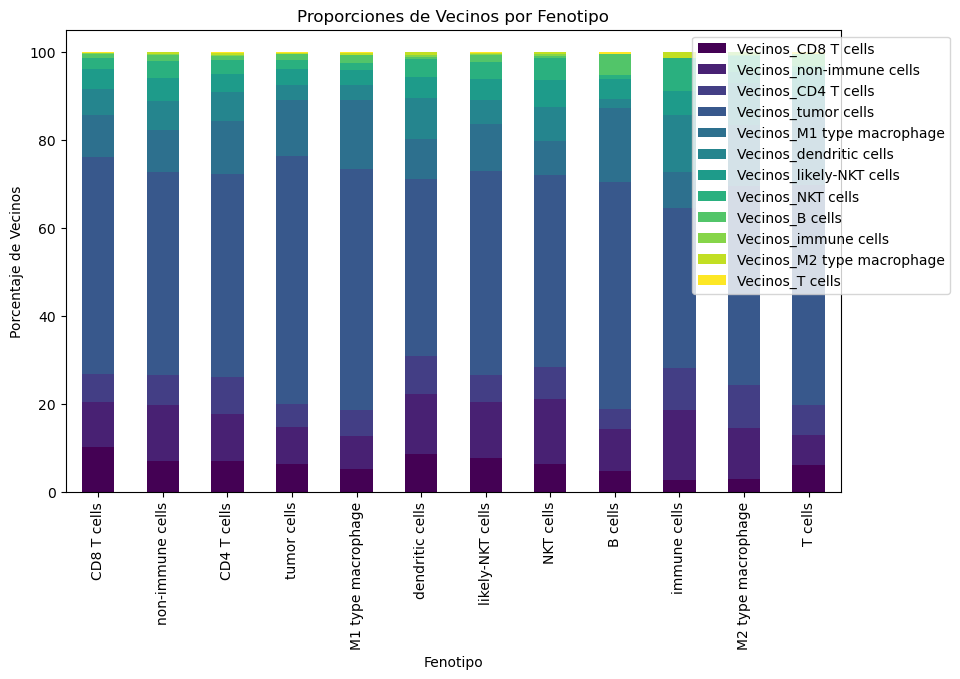

In [17]:
# Graficar los resultados usando matplotlib con la paleta de colores viridis
colores = plt.cm.viridis(np.linspace(0, 1, len(df_resultado.columns)))

df_resultado.plot(kind='bar', stacked=True, figsize=(10, 6), color=colores)
plt.title('Proporciones de Vecinos por Fenotipo')
plt.xlabel('Fenotipo')
plt.ylabel('Porcentaje de Vecinos')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


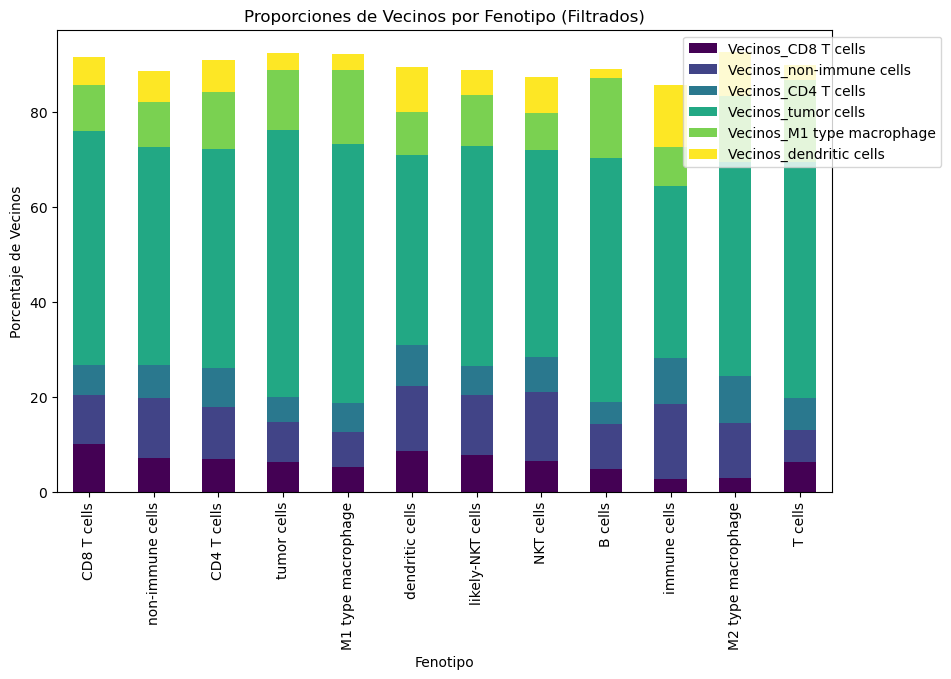

In [23]:
# Establecer un umbral para filtrar fenotipos basados en su contribución mínima
umbral = 8
fenotipos_importantes = df_resultado.loc[:, (df_resultado > umbral).any(axis=0)]
colores = plt.cm.viridis(np.linspace(0, 1, len(fenotipos_importantes.columns)))
fenotipos_importantes.plot(kind='bar', stacked=True, figsize=(10, 6), color=colores)
plt.title('Proporciones de Vecinos por Fenotipo (Filtrados)')
plt.xlabel('Fenotipo')
plt.ylabel('Porcentaje de Vecinos')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


Hacer reduccion de dimensionalidad 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Procesando archivo: high_grade_dysplasia.csv


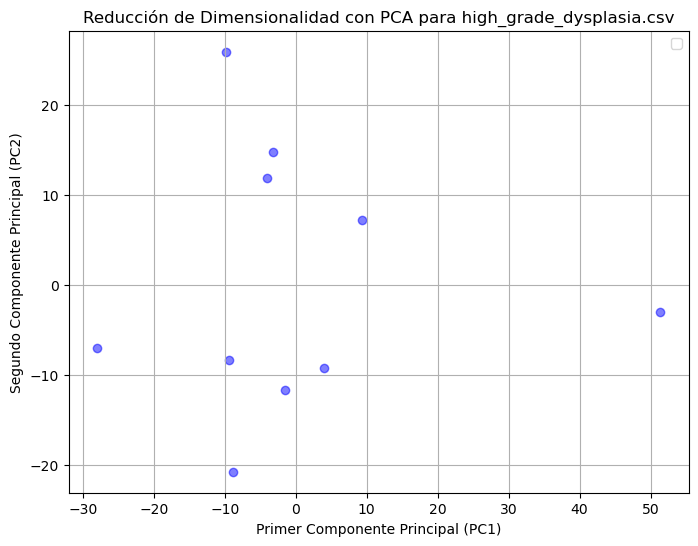

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Varianza explicada por los componentes principales:
PC1: 63.77%
PC2: 31.19%
PC3: 3.64%
PC4: 1.05%

--------------------------------------------------------------------------------

Procesando archivo: filtered_high_grade_dysplasia.csv


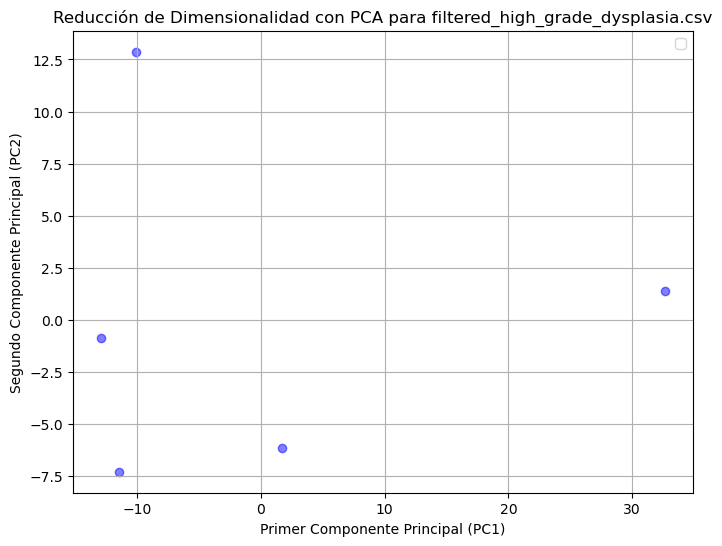

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Varianza explicada por los componentes principales:
PC1: 84.11%
PC2: 14.86%
PC3: 0.72%
PC4: 0.32%

--------------------------------------------------------------------------------

Procesando archivo: low_grade_dysplasia.csv


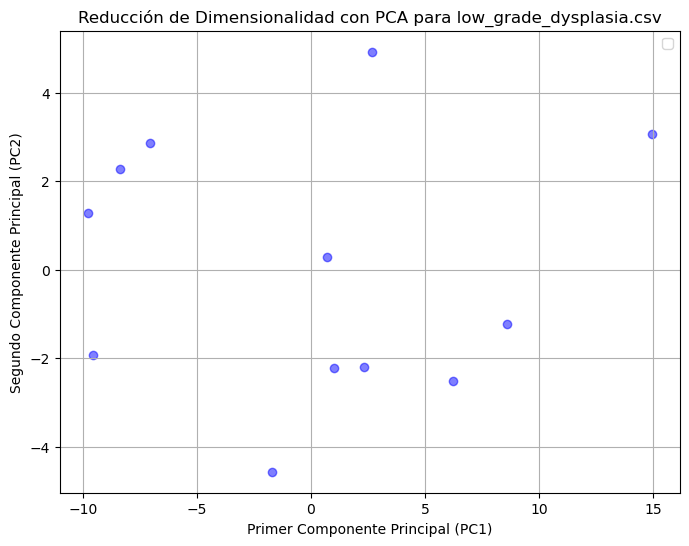

Varianza explicada por los componentes principales:
PC1: 79.73%
PC2: 11.00%
PC3: 4.66%
PC4: 3.33%

--------------------------------------------------------------------------------



In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Parámetros de configuración
n_componentes = 4  # Número de componentes principales para PCA

# Iterar sobre los resultados para procesar cada archivo
for archivo, df_resultado in resultados.items():
    print(f'Procesando archivo: {archivo}')
    
    # Preparar los datos: extraer todos los valores del DataFrame
    datos = df_resultado.values
    
    # Realizar PCA
    pca = PCA(n_components=n_componentes)
    componentes_principales = pca.fit_transform(datos)

    # Crear un DataFrame para los componentes principales
    df_pca = pd.DataFrame(data=componentes_principales, columns=[f'PC{i+1}' for i in range(n_componentes)])
    
    # Agregar 'Phenotype' para visualización si está presente en el DataFrame original
    if 'Phenotype' in df_resultado.columns:
        df_pca['Phenotype'] = df_resultado['Phenotype']

    # Visualizar los dos primeros componentes principales
    plt.figure(figsize=(8, 6))
    if 'Phenotype' in df_pca.columns:
        for fenotipo in df_pca['Phenotype'].unique():
            subset = df_pca[df_pca['Phenotype'] == fenotipo]
            plt.scatter(subset['PC1'], subset['PC2'], label=fenotipo, alpha=0.5)
    else:
        plt.scatter(df_pca['PC1'], df_pca['PC2'], color='blue', alpha=0.5)

    plt.xlabel('Primer Componente Principal (PC1)')
    plt.ylabel('Segundo Componente Principal (PC2)')
    plt.title(f'Reducción de Dimensionalidad con PCA para {archivo}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar la varianza explicada por los componentes principales
    print("Varianza explicada por los componentes principales:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f'PC{i+1}: {var:.2%}')

    print('\n' + '-' * 80 + '\n')


UMAP

In [37]:
pip install umap-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 12.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install importlib-metadata


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


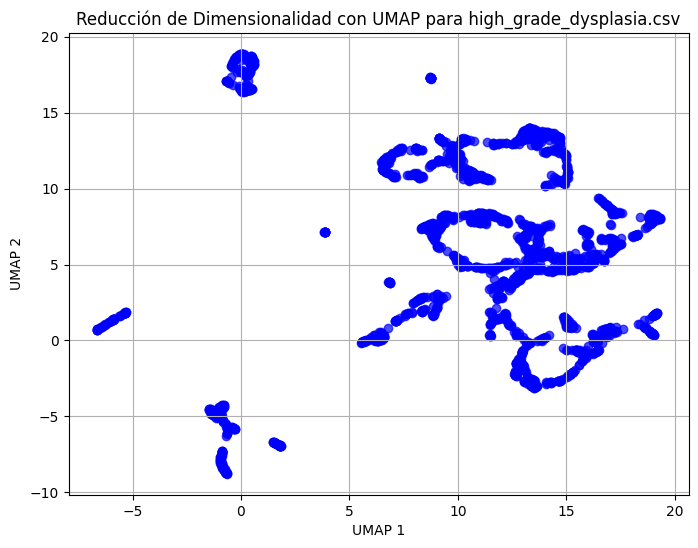

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


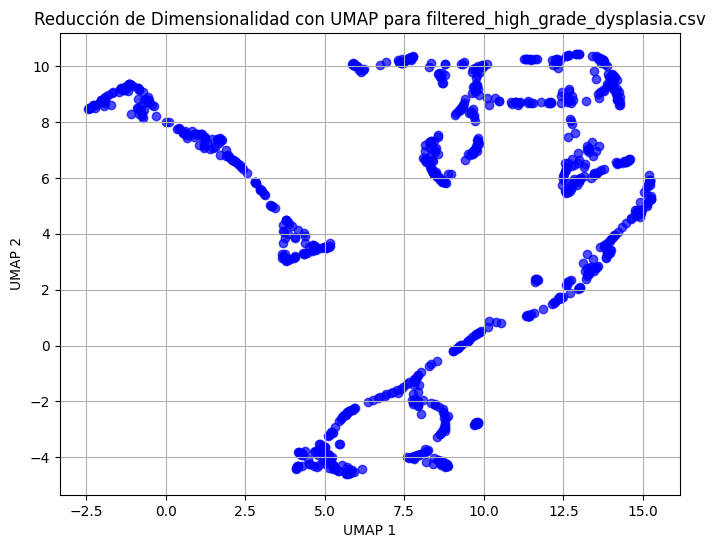

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


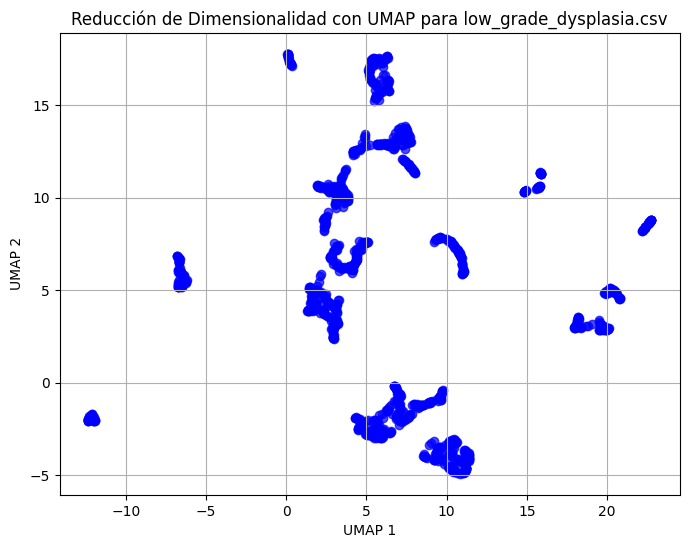

In [13]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Iterar sobre los archivos de resultados obtenidos previamente
for archivo, df_resultado in resultados.items():
    # Asegúrate de que solo se utilicen las columnas numéricas para la reducción de dimensionalidad
    datos_numericos = df_resultado.drop(['CellID', 'Phenotype'], axis=1)
    
    # Estandarizar los datos numéricos
    datos_estandarizados = StandardScaler().fit_transform(datos_numericos)
    
    # Aplicar UMAP
    umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    umap_result = umap_model.fit_transform(datos_estandarizados)
    
    # Visualización de UMAP
    plt.figure(figsize=(8, 6))
    plt.scatter(umap_result[:, 0], umap_result[:, 1], c='blue', alpha=0.7)
    plt.title(f'Reducción de Dimensionalidad con UMAP para {archivo}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.grid(True)
    plt.show()


/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


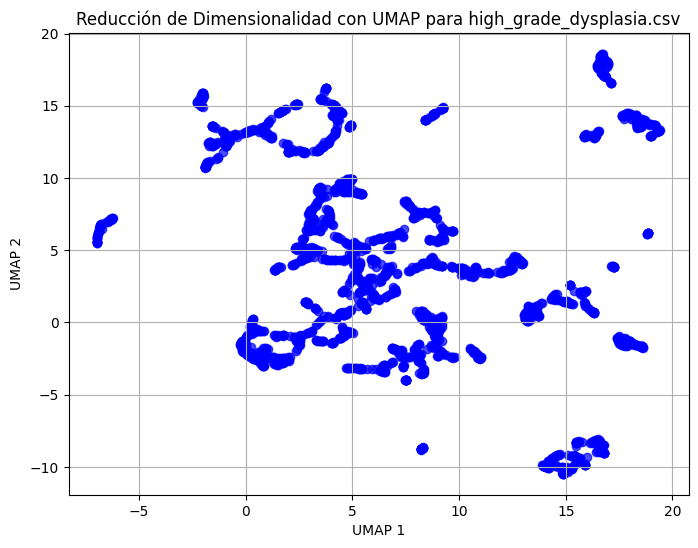

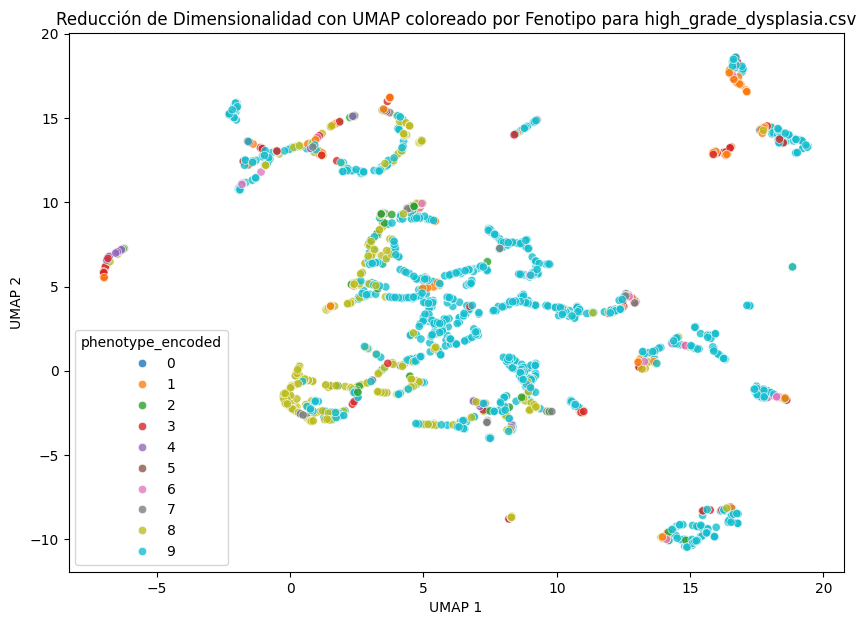

Fenotipos por clúster para high_grade_dysplasia.csv:


Phenotype  B cells  CD4 T cells  CD8 T cells  M1 type macrophage  NKT cells  \
Cluster                                                                       
0                0            8           11                   6          1   
1                1           12            1                  20          2   
2                0            7           17                   2          0   
3                0            4            0                   8          0   
4                0            2            1                  10          0   
5                0            7            6                   1          0   
6                0            6            3                  13          3   
7                0           13            0                   6          0   
8                0            2            0                   5          1   
9                0           13            4                  12         15   
10               0            0            7                   2         11   
11               1            0            2                   0          0   
12               0            0            0                   0          0   
13               0            0            2                   0          0   
14               0            0            0                   0          2   
15               0           18            1                  22          0   
16               0            4            0                   0          0   
17               0            0            0                   0          0   
18               0            0            0                   0          0   
19               0           13            1                   1          0   
20               0            8            3                   6          1   
21               0            0            0                   6          0   
22               0           17            0                  15          0   
23               0            6            7                   4          1   
24               2           11            0                  10          0   
25               0            0            0                   0          0   
26               0            0            0                   5          4   
27               0            0            0                   0          2   
28               0            0            1                   0          0   
29               0            0            1                   0          1   

Phenotype  T cells  dendritic cells  likely-NKT cells  non-immune cells  \
Cluster                                                                   
0                0                0                11               192   
1                0                3                 2                21   
2                0                5                15                56   
3                0                0                 0                 3   
4                0                0                 0                 1   
5                0                1                 0                 7   
6                0                3                 6                 6   
7                0                5                 0                18   
8                0                0                 1                 7   
9                0                1                 6                 2   
10               0                0                12                45   
11               0                1                 1                 2   
12               0                0                 0                 3   
13               0                0                 0                27   
14               0                0                 0                 2   
15               0                1                 0                 1   
16               0                0                 0                17   
17               0                0           

Varianza de fenotipos dentro de los clústeres para high_grade_dysplasia.csv:


Cluster
0      2.195878
1      8.455319
2      6.185545
3      8.351429
4     10.130682
5      6.762523
6      6.205654
7      8.976334
8      7.595699
9      4.170537
10     2.760173
11     1.983070
12     0.118577
13     1.965700
14     4.177778
15    11.816286
16     7.933333
17     0.000000
18     0.000000
19    10.794553
20     5.985537
21     5.142857
22     1.028226
23     7.010000
24    11.078481
25     0.428571
26     5.088235
27     4.400000
28     2.923077
29     5.142857
Name: phenotype_encoded, dtype: float64

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


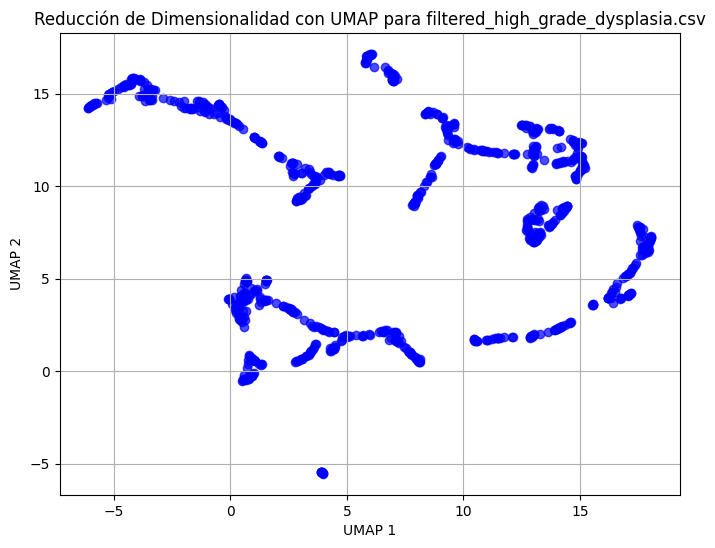

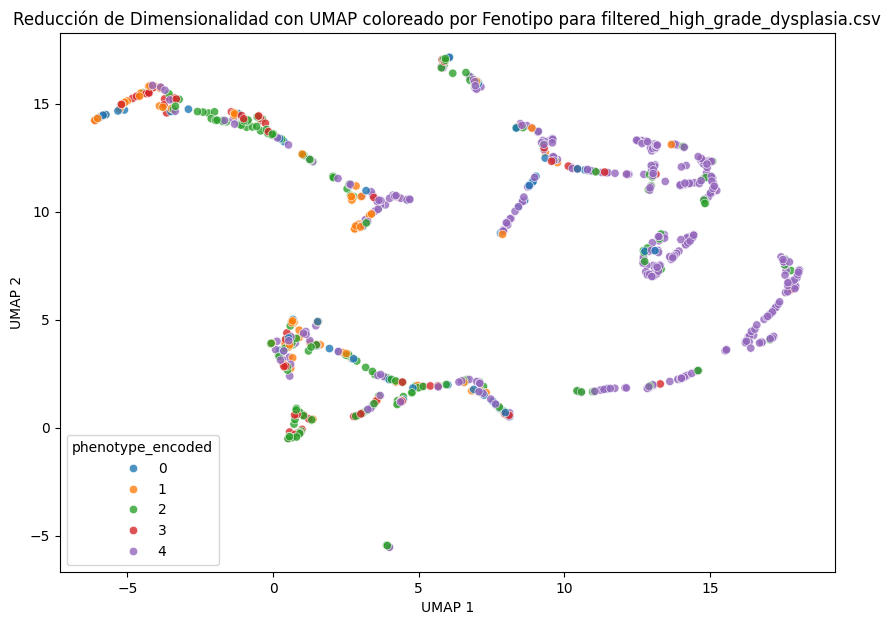

Fenotipos por clúster para filtered_high_grade_dysplasia.csv:


Phenotype  CD4 T cells  CD8 T cells  M1 type macrophage  M2 type macrophage  \
Cluster                                                                       
-1                   0            0                   0                   0   
 0                  11            1                   0                   0   
 1                   1            0                   9                   3   
 2                   2            0                   9                   0   
 3                   0            0                   5                   1   
 4                   0            0                   0                   0   
 5                   0            0                   3                   1   
 6                   2           16                  13                   1   
 7                   6            3                   6                   9   
 8                   0            0                   6                   1   
 9                  20            6                  31                  12   
 10                 15           30                  26                   8   
 11                  3            1                   7                   0   
 12                  4            3                  17                   2   
 13                  3            3                  34                  10   
 14                  0            1                  24                  11   
 15                  0            0                   9                   0   
 16                 12           19                   9                  22   
 17                  0            1                   8                   0   
 18                  0            1                  10                   5   
 19                  0            1                   1                   0   

Phenotype  tumor cells  
Cluster                 
-1                   2  
 0                  28  
 1                  39  
 2                  12  
 3                  12  
 4                   5  
 5                  26  
 6                  38  
 7                  40  
 8                  69  
 9                  23  
 10                 20  
 11                 62  
 12                 13  
 13                  7  
 14                  0  
 15                  1  
 16                  7  
 17                  3  
 18                  4  
 19                 24

Varianza de fenotipos dentro de los clústeres para filtered_high_grade_dysplasia.csv:


Cluster
-1     0.000000
 0     3.327564
 1     0.842760
 2     1.754941
 3     0.839869
 4     0.000000
 5     0.391954
 6     1.892547
 7     1.752976
 8     0.303684
 9     2.070712
 10    1.801484
 11    1.020548
 12    1.726046
 13    0.875940
 14    0.263492
 15    0.400000
 16    1.710145
 17    0.992424
 18    0.778947
 19    0.481538
Name: phenotype_encoded, dtype: float64

/opt/conda/envs/umap/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


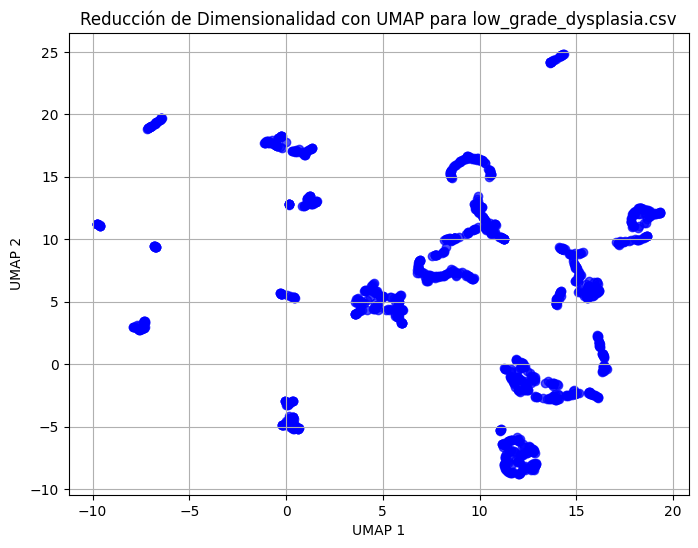

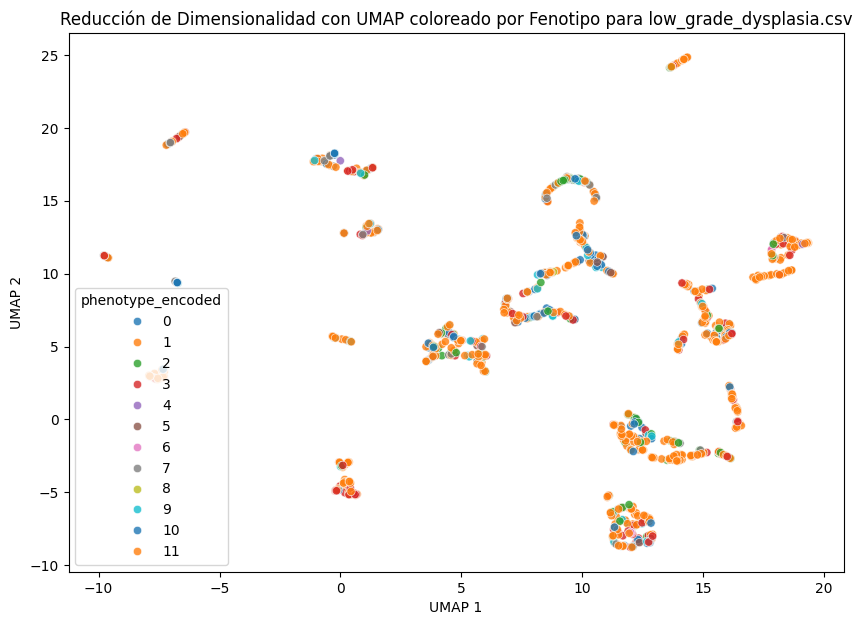

Fenotipos por clúster para low_grade_dysplasia.csv:


Phenotype  B cells  CD4 T cells  CD8 T cells  M1 type macrophage  \
Cluster                                                            
0                0           17           16                   8   
1                0            4            1                   4   
2                0            3            0                   0   
3                0            2            2                   5   
4                0            5           15                   4   
5                2            1            1                   1   
6                0            1            0                   0   
7                0            1            0                   0   
8                7            2            4                  15   
9                0            4            3                  14   
10               2            2            8                  10   
11               0            0            0                   6   
12               4            9            8                  22   
13               0            2            1                   2   
14               0            0            0                   2   
15               2            2            1                   4   
16               0            1            2                   5   
17               1            5            7                   7   
18               0            3            1                   2   
19               0            1            3                   3   
20               1            2            0                  14   
21               0            4            1                   3   
22               0            5           10                   2   
23               0            0            1                   4   
24               0            0            1                   1   
25               0            2            1                   2   
26               0            3            0                   0   
27               0            0            0                   3   

Phenotype  M2 type macrophage  NKT cells  T cells  dendritic cells  \
Cluster                                                              
0                           0          5        0                7   
1                           0          1        0                6   
2                           0          3        0                2   
3                           0          2        0                3   
4                           0          3        0               14   
5                           0          9        0                1   
6                           0          0        0                0   
7                           1          5        0                5   
8                           0          1        0                1   
9                           1          0        1                1   
10                          0          2        0                3   
11                          0          1        0                0   
12                          0          2        2                4   
13                          0          0        0                0   
14                          0          0        0                0   
15                          0          0        0                0   
16                          0          0        0                1   
17                          0          0        0                2   
18                          0          0        0                3   
19                          0          0        0                2   
20                          0          0        0                1   
21                          1          3        0                3   
22                          0          1        0                1   
23                          0          0        0                0   
24                          0          0        0                1   
25                          0          0        0                1   

Varianza de fenotipos dentro de los clústeres para low_grade_dysplasia.csv:


Cluster
0     17.129454
1     14.629032
2     11.939560
3     13.683712
4     14.015439
5      6.219165
6      4.861905
7      6.831309
8     16.314320
9     16.285714
10    14.648851
11    11.310345
12    16.920248
13    10.751894
14     4.116092
15    19.138462
16    15.944615
17    18.430158
18    15.696970
19    15.477273
20    16.982828
21    14.584874
22    14.025308
23    14.016340
24    14.500000
25    17.208791
26    17.571429
27     9.310458
Name: phenotype_encoded, dtype: float64

In [18]:
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
import pandas as pd

# Iterar sobre los archivos de resultados obtenidos previamente
for archivo, df_resultado in resultados.items():
    # Asegúrate de que solo se utilicen las columnas numéricas para la reducción de dimensionalidad
    datos_numericos = df_resultado.drop(['CellID', 'Phenotype'], axis=1)
    
    # Estandarizar los datos numéricos
    datos_estandarizados = StandardScaler().fit_transform(datos_numericos)
    
    # Aplicar UMAP
    umap_model = umap.UMAP(n_neighbors=8, min_dist=0.1, n_components=2, random_state=42)
    umap_result = umap_model.fit_transform(datos_estandarizados)
    
    # Crear un DataFrame para almacenar los resultados de UMAP junto con los fenotipos
    df_umap = pd.DataFrame(umap_result, columns=['UMAP 1', 'UMAP 2'])
    df_umap['Phenotype'] = df_resultado['Phenotype'].values
    
    # Visualización de UMAP sin coloración de fenotipos
    plt.figure(figsize=(8, 6))
    plt.scatter(df_umap['UMAP 1'], df_umap['UMAP 2'], c='blue', alpha=0.7)
    plt.title(f'Reducción de Dimensionalidad con UMAP para {archivo}')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.grid(True)
    plt.show()
    
    # Crear una copia del DataFrame y codificar los fenotipos
    df_umap['phenotype_encoded'] = LabelEncoder().fit_transform(df_umap['Phenotype'])
    
    # Crear una lista de colores para los fenotipos
    plt.figure(figsize=(10, 7))
    sns.scatterplot(
        x='UMAP 1', y='UMAP 2',
        hue='phenotype_encoded',
        palette='tab10',  # Puedes ajustar la paleta de colores
        data=df_umap,
        legend='full',
        alpha=0.8
    )
    plt.title(f'Reducción de Dimensionalidad con UMAP coloreado por Fenotipo para {archivo}')
    plt.show()

    # Aplicar DBSCAN para encontrar clústeres en los datos UMAP
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(df_umap[['UMAP 1', 'UMAP 2']])
    
    # Añadir los resultados de clúster al DataFrame
    df_umap['Cluster'] = clusters
    
    # Calcular cuántos fenotipos hay por clúster
    fenotipos_por_cluster = df_umap.groupby('Cluster')['Phenotype'].value_counts().unstack(fill_value=0)
    print(f'Fenotipos por clúster para {archivo}:')
    display(fenotipos_por_cluster)
    
    # Calcular la varianza de fenotipos por clúster
    varianza_fenotipos = df_umap.groupby('Cluster')['phenotype_encoded'].var()
    print(f'Varianza de fenotipos dentro de los clústeres para {archivo}:')
    display(varianza_fenotipos)
